In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('logistic_regression.csv')

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


#Examine dataset structure, characteristics, and statistical summary.

In [ ]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include ='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.shape

(396030, 27)

In [ ]:
#value counts of object columns
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print(df[i].value_counts())

term
term
36 months    302005
60 months     94025
Name: count, dtype: int64
grade
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
sub_grade
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
emp_title
emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
OMIV Supervisor                1
SVP, Technology                1
sikorsky                       1
Postman            

In [ ]:
#unique value of object columns
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print(df[i].unique())

term
[' 36 months' ' 60 months']
grade
['B' 'A' 'C' 'E' 'D' 'F' 'G']
sub_grade
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
emp_title
['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
emp_length
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
home_ownership
['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']
verification_status
['Not Verified' 'Source Verified' 'Verified']
issue_d
['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016'

In [ ]:
#value counts for float type columns
for i in df.columns:
    if df[i].dtypes == 'float64':
        print(i)
        print(df[i].value_counts())

loan_amnt
loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
39200.0        1
38750.0        1
36275.0        1
36475.0        1
725.0          1
Name: count, Length: 1397, dtype: int64
int_rate
int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.38        1
24.40        1
22.64        1
17.54        1
17.44        1
Name: count, Length: 566, dtype: int64
installment
installment
327.34     968
332.10     791
491.01     736
336.90     686
392.81     683
          ... 
1146.14      1
218.49       1
961.66       1
569.10       1
555.96       1
Name: count, Length: 55706, dtype: int64
annual_inc
annual_inc
60000.0    15313
50000.0    13303
65000.0    11333
70000.0    10674
40000.0    10629
           ...  
67842.0        1
72179.0        1
50416.0        1
46820.8        1
87622.0        1
Name: count, Length: 27197, dtype: int64
dti
dti
0.00       313
14.40      310
19.20      30

#Data Preprocessing

In [ ]:
# how many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing_value' :df.isna().sum(),
              'Percentage' : round((df.isna().sum()/df.shape[0])*100,2) })
missing_value.sort_values(by='Percentage',ascending = False)

,Missing_value,Percentage
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1756,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07
installment,0,0.00
int_rate,0,0.00
term,0,0.00
grade,0,0.00


Before doing imputation we have understand the depth of feature column and we can decide imputation method based on that. Feature which is important to us is mort_acc which might significantly affect our target variable i.e Loan status.
Missing % of mort_acc is higher i.e imputation technique has to be used whereas other missing values rows can be deleted from dataset as this is much lower in comparison to whole dataset also missing values also hampers machine learning model.

In [ ]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


## Hypothesis Testing

In [ ]:
from scipy.stats import chi2_contingency

# H0: mort_acc  and Loan status is independent

chi2_contingency(pd.crosstab(df['mort_acc'], df['loan_status']))

Chi2ContingencyResult(statistic=np.float64(2302.124710409491), pvalue=np.float64(0.0), dof=32, expected_freq=array([[2.81411268e+04, 1.11635873e+05],
       [1.21634770e+04, 4.82525230e+04],
       [1.00559677e+04, 3.98920323e+04],
       [7.66035710e+03, 3.03886429e+04],
       [5.61445448e+03, 2.22725455e+04],
       [3.66297504e+03, 1.45310250e+04],
       [2.22850779e+03, 8.84049221e+03],
       [1.21844151e+03, 4.83355849e+03],
       [6.28346987e+02, 2.49265301e+03],
       [3.33400388e+02, 1.32259961e+03],
       [1.74149357e+02, 6.90850643e+02],
       [9.64364649e+01, 3.82563535e+02],
       [5.31507865e+01, 2.10849214e+02],
       [2.93939956e+01, 1.16606004e+02],
       [2.15421748e+01, 8.54578252e+01],
       [1.22810529e+01, 4.87189471e+01],
       [7.44916326e+00, 2.95508367e+01],
       [4.42923221e+00, 1.75707678e+01],
       [3.62391726e+00, 1.43760827e+01],
       [3.01993105e+00, 1.19800689e+01],
       [2.61727358e+00, 1.03827264e+01],
       [8.05314947e-01, 3.1946

P value <.05 that mean we reject null hypothesis and this means mort_Acc and loan status are dependent and hence we have to do imputation on mort_Acc and we just cant delete missing values, here we will use mode(most frequent) label in place of missing values.

Simple imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['mort_acc'] = pd.DataFrame(imputer.fit_transform(df[['mort_acc']]))

Mort_acc is the feature column which shows number of mortgage account for the individual which is important in finding target variable and hence we will make this as binary column and make it as 1 if individual has more than 1 mortgage account and 0 for no mortgage.

In [ ]:
df['mort_acc'] = df['mort_acc'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df.shape

(396030, 27)

In [ ]:
df['mort_acc'].value_counts()

,count
mort_acc,
1,218458
0,177572


We have done imputation technique for missing values on mort_acc whereas for other column missing values rows can be deleted because values in% are very low and are not important also for ML model.

In [ ]:

df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


All the missing values removed.

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,329882
1.0,38599
2.0,1703
3.0,325
4.0,71
5.0,30
6.0,5
7.0,4
8.0,2


#Feature Engineering

We will assign pub_rec,pub_rec_bankruptcies,mort_acc as binary 1 and 0, 1 will be assigned to who has records of 1 or more. These columns are very much important for our target column and having bankrupcy record in the past is the red flag for the company so will classify them as 1 whosoever has more than 1 bankrupcy record

In [ ]:
df2 = df.copy()

In [ ]:
df2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df2['pub_rec'] = df2['pub_rec'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df2['pub_rec_bankruptcies'] = df2['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
df2['pub_rec'].value_counts()

,count
pub_rec,
0,318266
1,52355


In [ ]:
df2['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0,329882
1,40739


#Duplicates

In [ ]:
df2.duplicated().sum()

np.int64(0)

There are no duplicate values.

# Univariate analysis

## Histplot

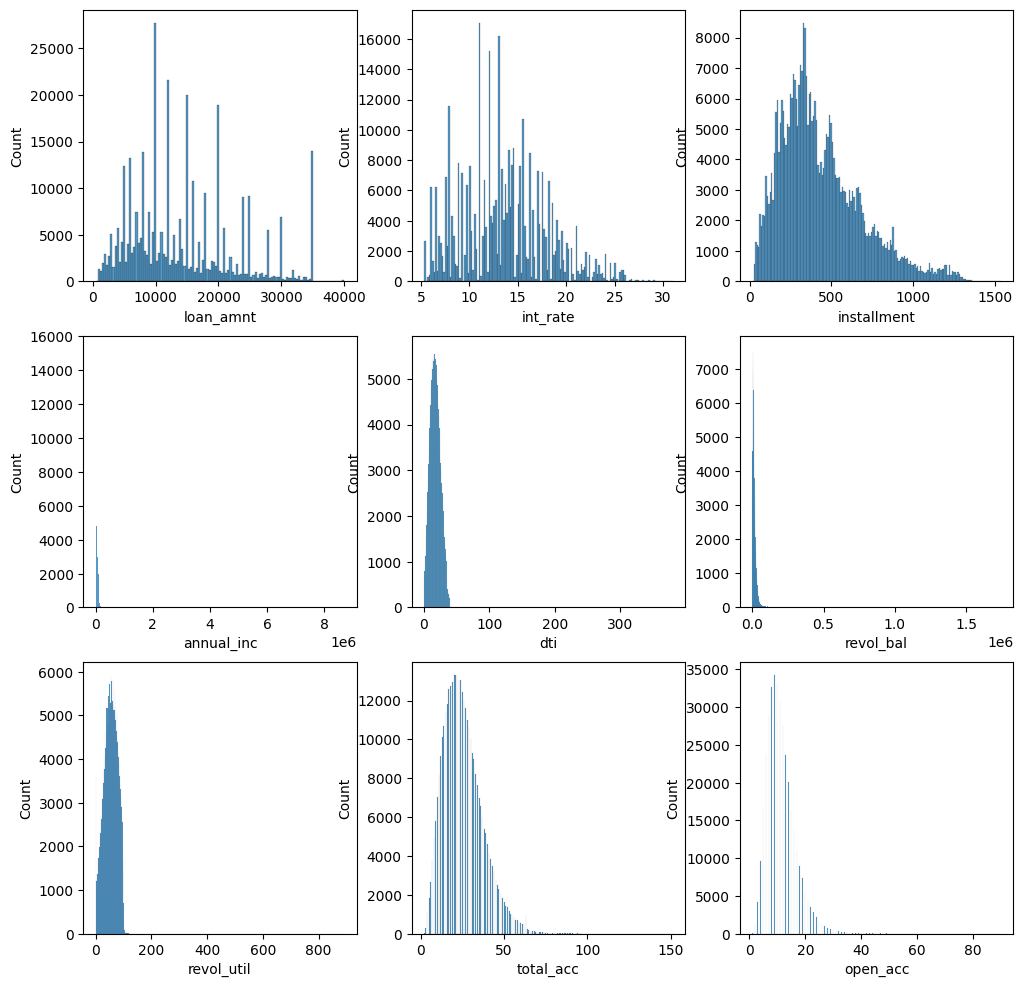

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.histplot(df2['loan_amnt'])

plt.subplot(3, 3, 2)
sns.histplot(df2['int_rate'])

plt.subplot(3, 3, 3)
sns.histplot(df2['installment'])

plt.subplot(3, 3, 4)
sns.histplot(df2['annual_inc'])

plt.subplot(3, 3, 5)
sns.histplot(df2['dti'])

plt.subplot(3, 3, 6)
sns.histplot(df2['revol_bal'])

plt.subplot(3, 3, 7)
sns.histplot(df2['revol_util'])

plt.subplot(3, 3, 8)
sns.histplot(df2['total_acc'])

plt.subplot(3, 3, 9)
sns.histplot(df2['open_acc'])

plt.show()

Insights:

*   Every feature column distribution are almost fairly uniform in nature.




# Bivariate analysis

## Countplot or barplot

<Axes: xlabel='verification_status', ylabel='count'>

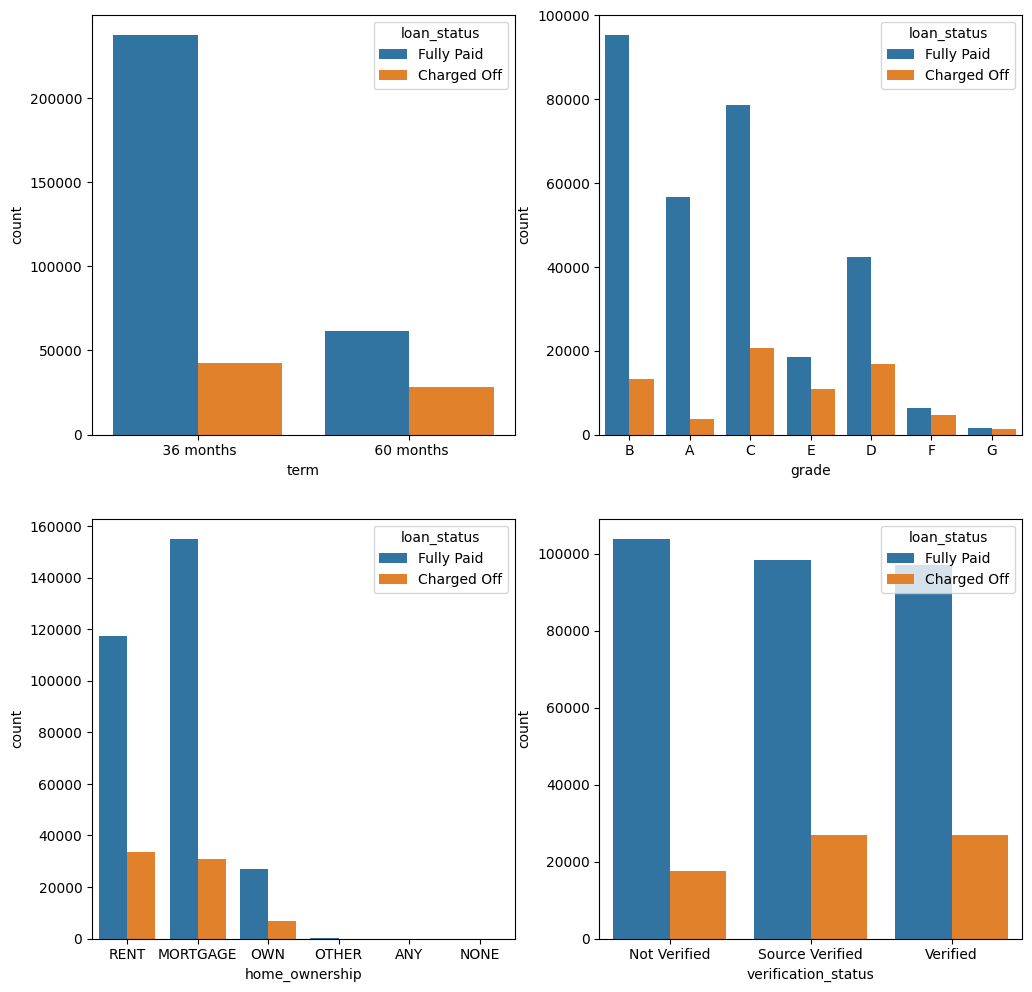

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.countplot(x = 'term', data = df2,hue = 'loan_status')

plt.subplot(2, 2, 2)
sns.countplot(x = 'grade', data = df2,hue = 'loan_status')

plt.subplot(2, 2, 3)
sns.countplot(x = 'home_ownership', data = df2,hue = 'loan_status')

plt.subplot(2, 2, 4)
sns.countplot(x = 'verification_status', data = df2,hue = 'loan_status')


Insights:

*   Feature column term can clearly shows loan are taken mostly for 36 months.
*   ABCD grade loan are mostly paid.
*   Loan which are taken by individuals have there home ownership as mortgage and rent mostly and individuals who own the home are less in numbers which means individuals who take loan are mostly not stable i.e they are in debt(mortgage loan) or living on rent.

*   There is slighlt higher number of individuals whose income is not verified have taken loan.








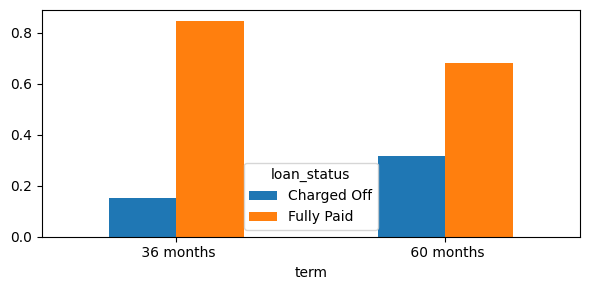

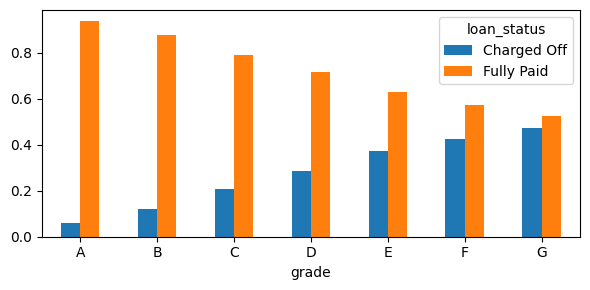

In [ ]:
col = ['term','grade']
for i in col:
    pd.crosstab(index = df2[i], columns = df2['loan_status'],normalize ='index').plot(kind='bar',figsize=(6,3))
    plt.xlabel(i)
    plt.xticks(rotation = 0)
    plt.tight_layout(h_pad=1)
    plt.show()

Insights:

*   This graphs shows ratio between loan paid and not paid of individuals
*   Feature column term can clearly shows  loan not paid individuals are higher for 60 months compare to 36 months.
*   ABCD grade loan are mostly paid whereas EFG grade loan are risky loans.Therefor based on these Loantap has marked as EFG grade.







# Questionnaire 4) People with grades ‘A’ are more likely to fully pay their loan. ?

Ans-)  Yes, as you see from above graph for grade A fully paid loan person almost are 90%

# Questionnaire 5) Name the top 2 afforded job titles.. ?

In [ ]:
df['emp_title'].value_counts().head(2)

,count
emp_title,
Teacher,4367
Manager,4231


Ans-)  Teacher and Manager are the two top most job title who applied for loans.

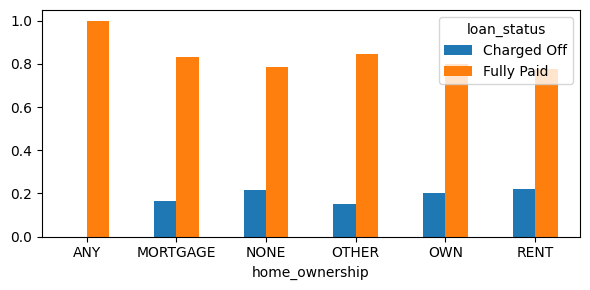

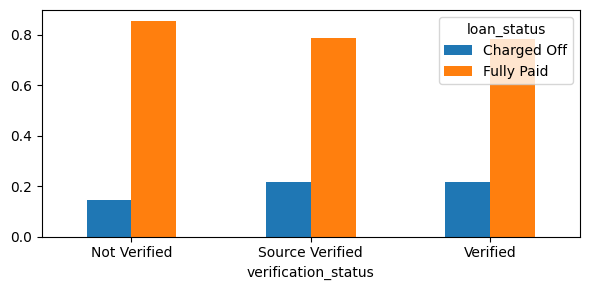

In [ ]:
col = ['home_ownership','verification_status']
for i in col:
    pd.crosstab(index = df2[i], columns = df2['loan_status'],normalize ='index').plot(kind='bar',figsize=(6,3))
    plt.xlabel(i)
    plt.xticks(rotation = 0)
    plt.tight_layout(h_pad=1)
    plt.show()

Insights:

*   This graphs shows ratio between loan paid and not paid of individuals
*   Home ownership bar shows no clear sign of differentitor for loans as almost all the ratios are same for different type of home ownership and almost same for verification status column.








In [ ]:
df2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

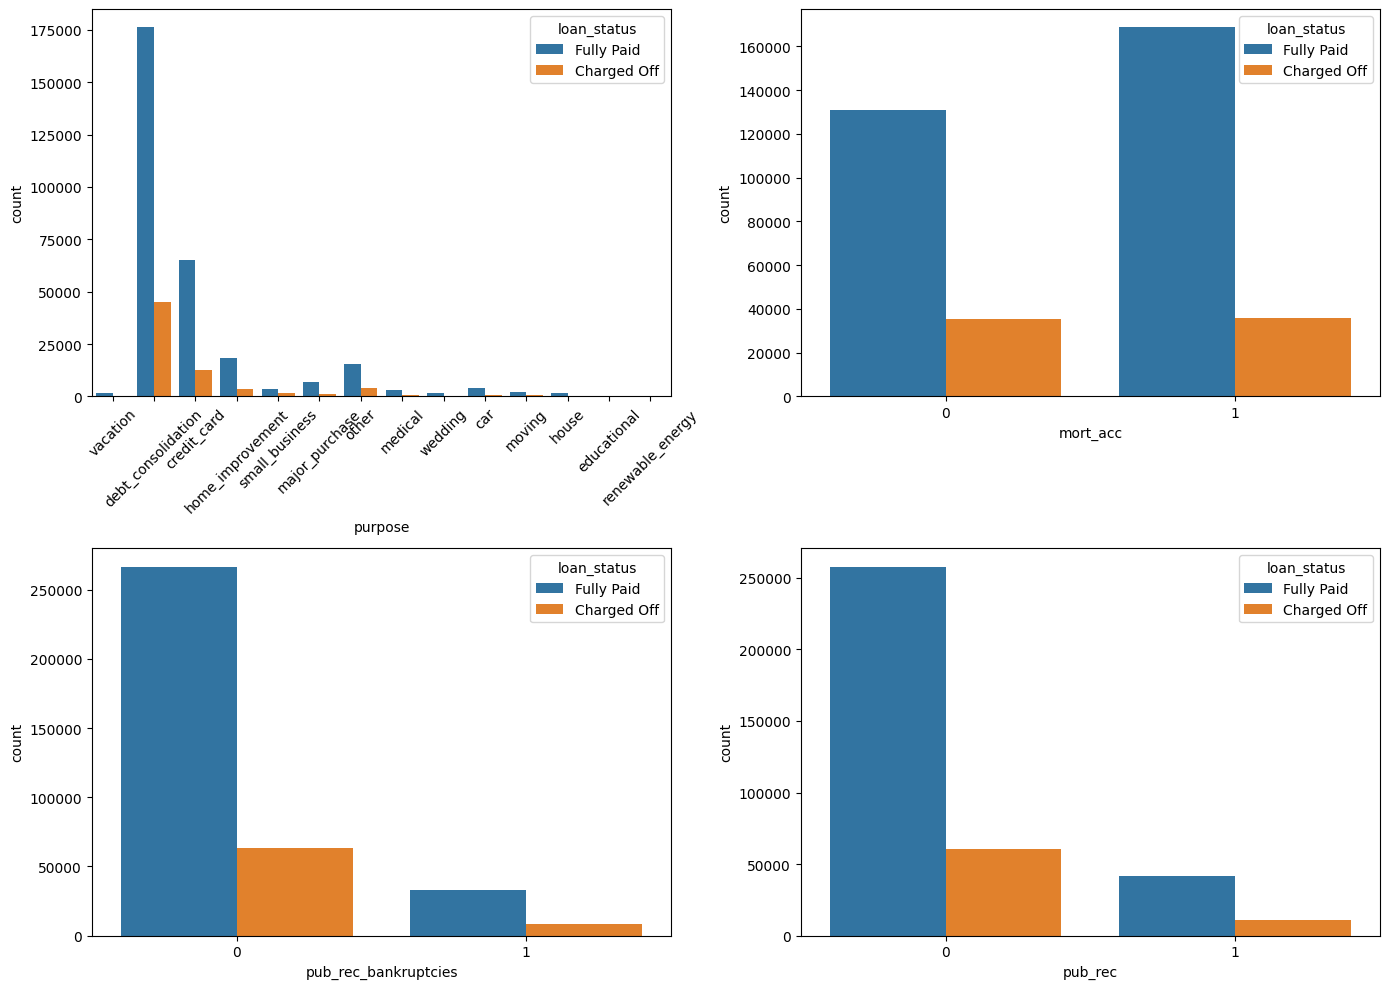

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x = 'purpose', data = df2,hue = 'loan_status')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x = 'mort_acc', data = df2,hue = 'loan_status')

plt.subplot(2, 2, 3)
sns.countplot(x = 'pub_rec_bankruptcies', data = df2,hue = 'loan_status')

plt.subplot(2, 2, 4)
sns.countplot(x = 'pub_rec', data = df2,hue = 'loan_status')

plt.tight_layout(h_pad=1)

Insights:

*   Loan taken by individual for the purpose of debt consolidation are mostly and for credit card whereas for other purpose number of individuals are very less.
*   pub_rec_bankrupcies and pub_rec are very important for the company as these red flags for them that is why mostly loans are not approved for individuals who have atleast 1 history of bad record.








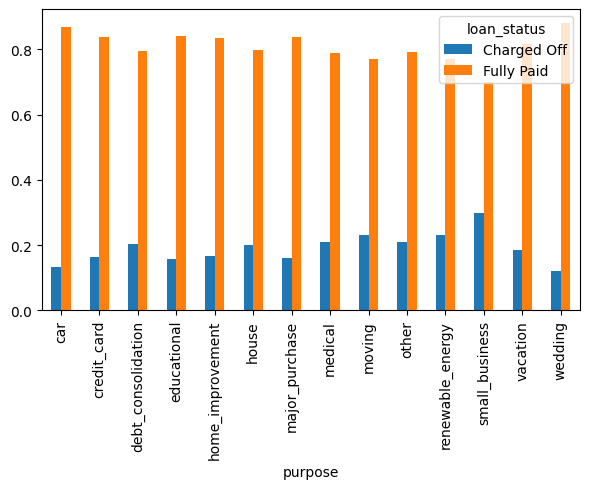

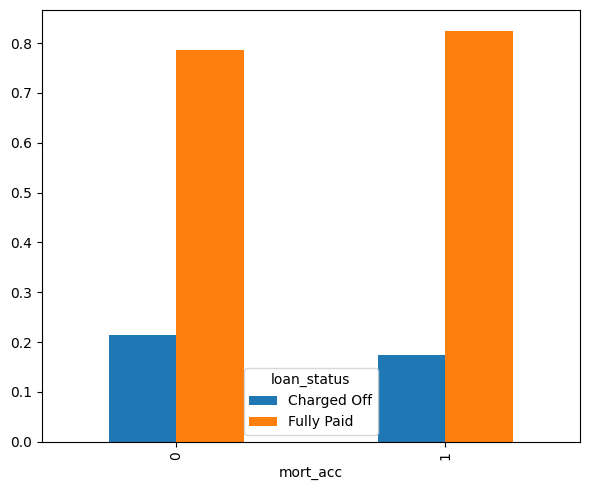

In [ ]:
col = ['purpose','mort_acc']
for i in col:
    pd.crosstab(index = df2[i], columns = df2['loan_status'],normalize ='index').plot(kind='bar',figsize=(6,5))
    plt.xlabel(i)
    plt.xticks(rotation = 90)
    plt.tight_layout(h_pad=1)
    plt.show()

Insights:

*   Defaulter ratio compare to fully paid are almost same for different purpose of individuals but loan taken for small business has high defaulter /fully paid ratio.
*   Ratios are almost same for mort_acc.








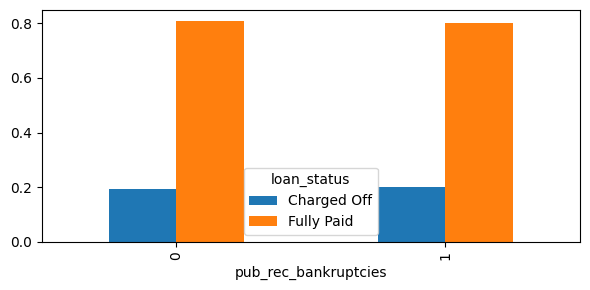

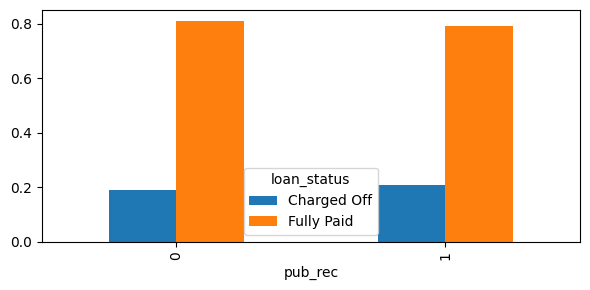

In [ ]:
col = ['pub_rec_bankruptcies','pub_rec']
for i in col:
    pd.crosstab(index = df2[i], columns = df2['loan_status'],normalize ='index').plot(kind='bar',figsize=(6,3))
    plt.xlabel(i)
    plt.xticks(rotation = 90)
    plt.tight_layout(h_pad=1)
    plt.show()

Insights:


*   Ratios are almost same for both the group.








In [ ]:
df2['purpose'].value_counts()

,count
purpose,
debt_consolidation,221262
credit_card,77554
home_improvement,22067
other,19441
major_purchase,8151
small_business,4756
car,4374
medical,3811
moving,2638


## Boxplot

In [ ]:
# we will plot boxplot for continous variable and hue of loan_status

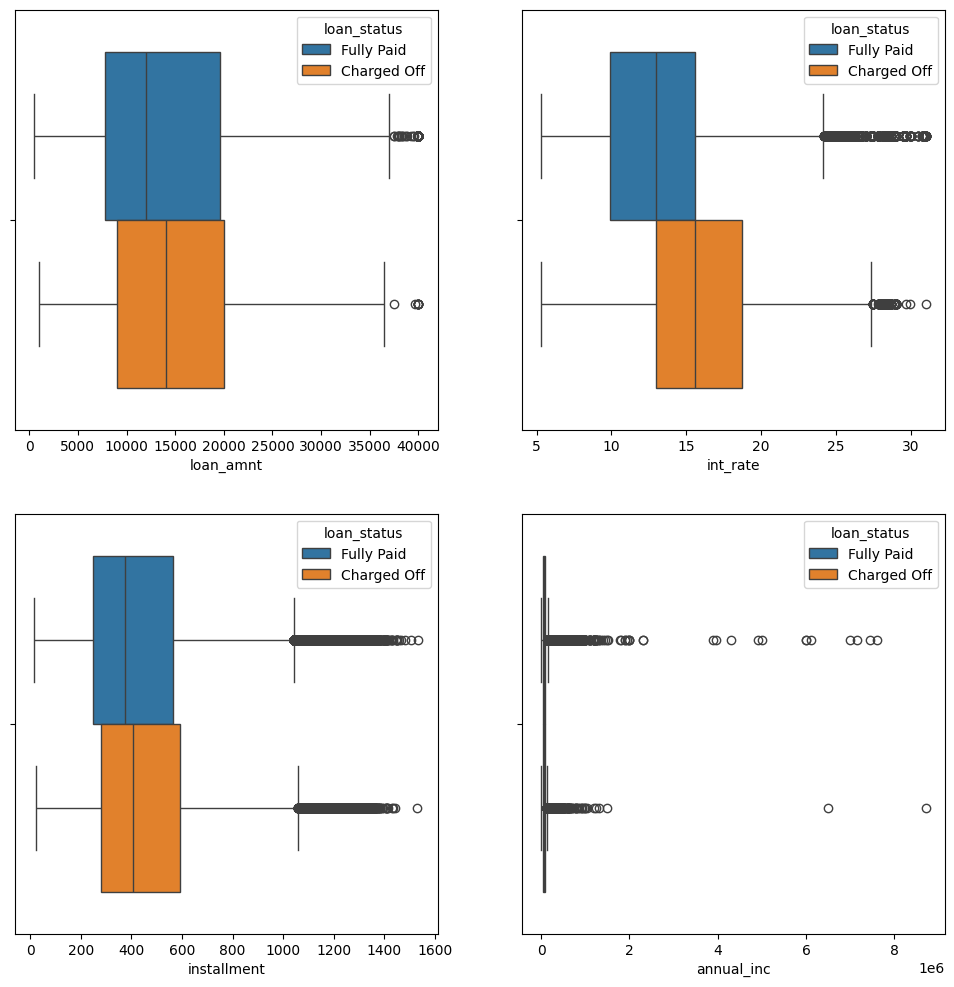

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x = 'loan_amnt',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 2)
sns.boxplot(x = 'int_rate',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'installment',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'annual_inc',data =df2 , hue = 'loan_status')

plt.show()

plt.tight_layout(h_pad=1)

Insights:

*   Loan amount graph clearly shows individuals who have defaulted are having median loan amount higher than individuals who have paid the loan. These is very important for the company highlight on.
*   Individuals who have defaulted has higher median interest rate compare to ones who fully paid. Also who fully paid the loans have higher outlier that means there income is high.Again important feature.

*   Median monthly repayment amount for defaulted individual are slightly higher than who fully paid.

*   Annual income has higher number of outliers, we cant remove these outlier because these individuals are important to us as they can repay the loan.












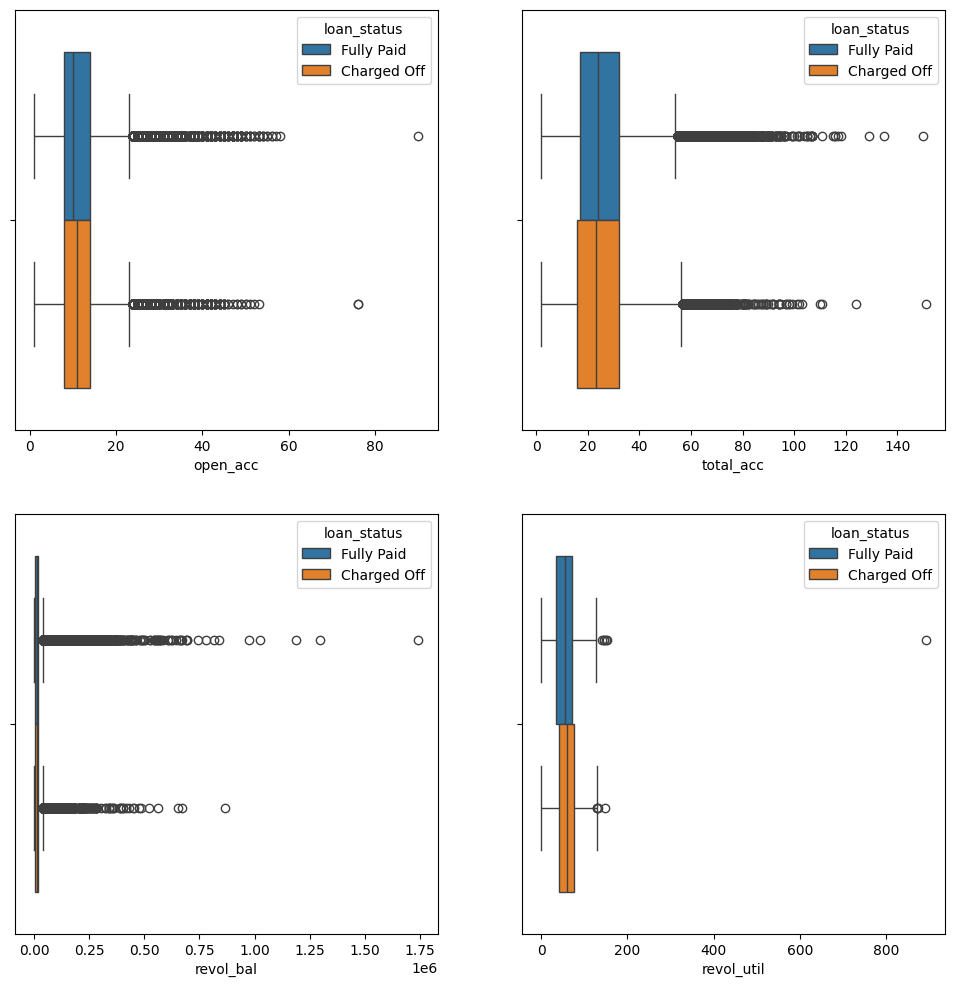

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x = 'open_acc',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 2)
sns.boxplot(x = 'total_acc',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'revol_bal',data =df2 , hue = 'loan_status')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'revol_util',data =df2 , hue = 'loan_status')

plt.show()

plt.tight_layout(h_pad=1)

Insights:

*   In every feature there are outliers but these outliers are important for our business to understand so dropping off them or capping is not a good idea and anyway we will be doing standardization before making a model.










## Scatterplot

In [ ]:
#pairplot

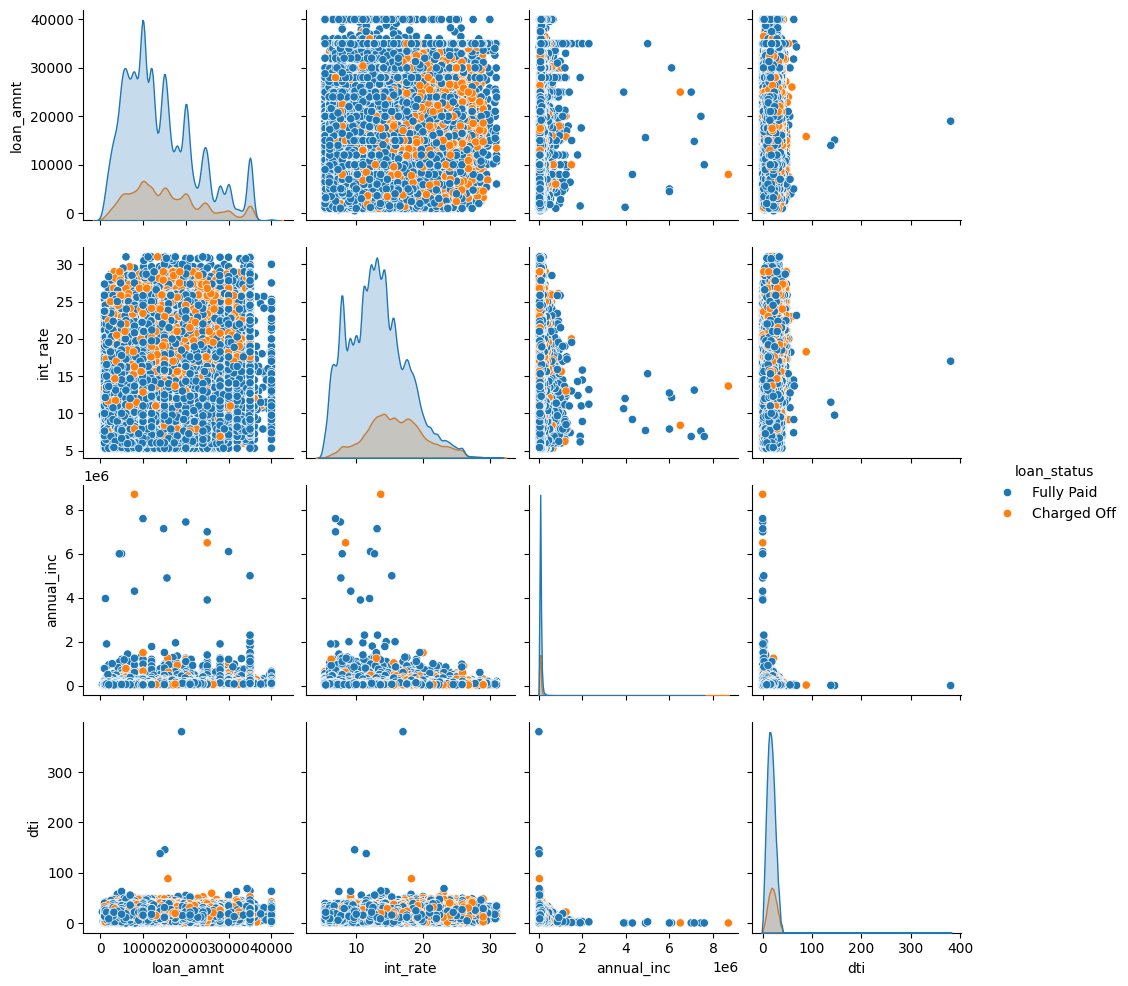

In [ ]:
selected_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'loan_status']
sns.pairplot(df2[selected_cols], hue='loan_status', height=2.5, aspect=1)
plt.show()


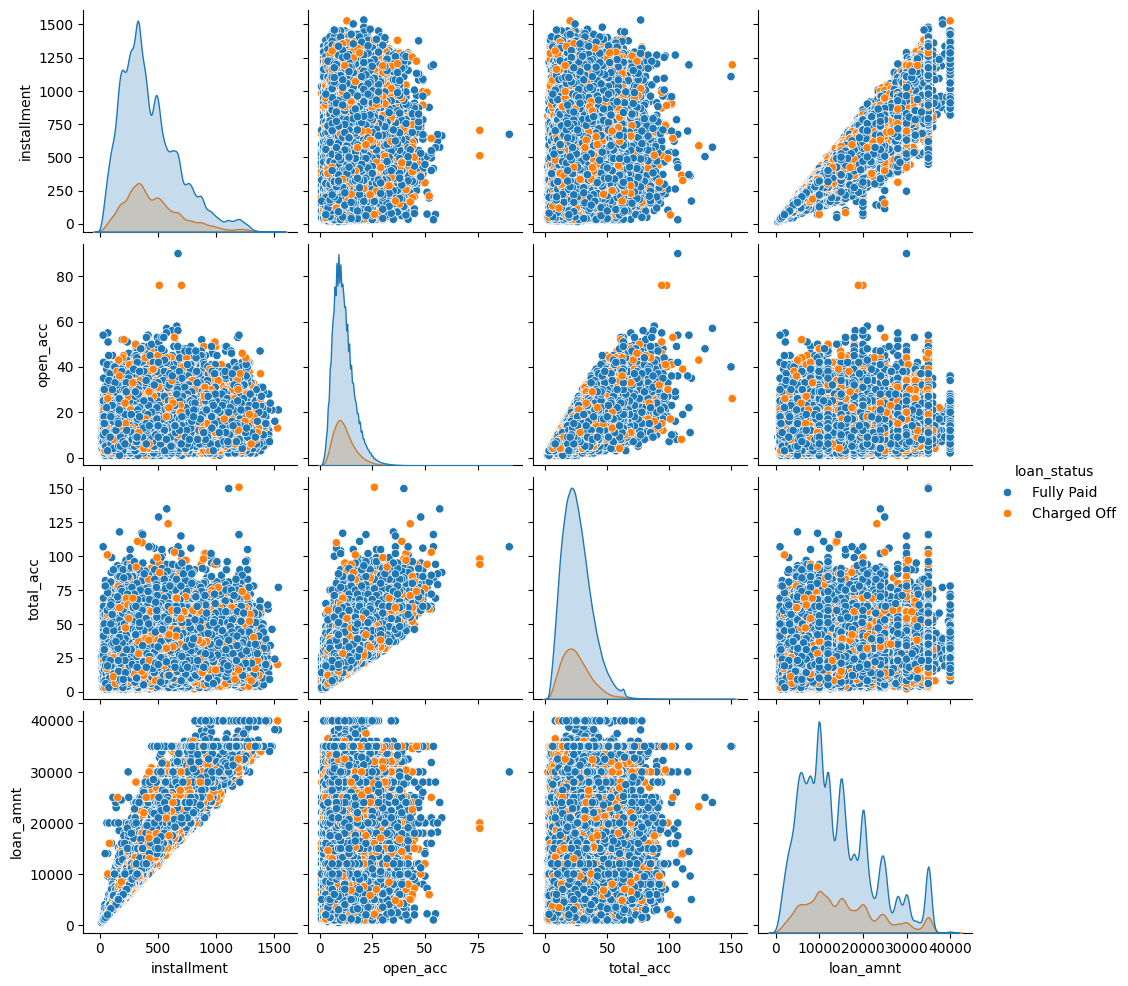

In [ ]:
selected_cols2 = ['installment','open_acc','total_acc','loan_status','loan_amnt']
sns.pairplot(df2[selected_cols2], hue='loan_status', height=2.5, aspect=1)
plt.show()

Insights:

*   Clearly installment and loan amount are mostly postively corelated and logically it is correct amount of installment is directly proportional to loan amount, since these columns are corelated we can drop one of them for machine learning model.
*   Also open account and total account are also linear corelated and anyone can be drop off.

*   Interest rate and loan amount graph clearly shows that defaulter has higher interest rate compare to other ones. Although other graph doesn't show any biasenes towards individual who fully paid the loan or defaulters.

















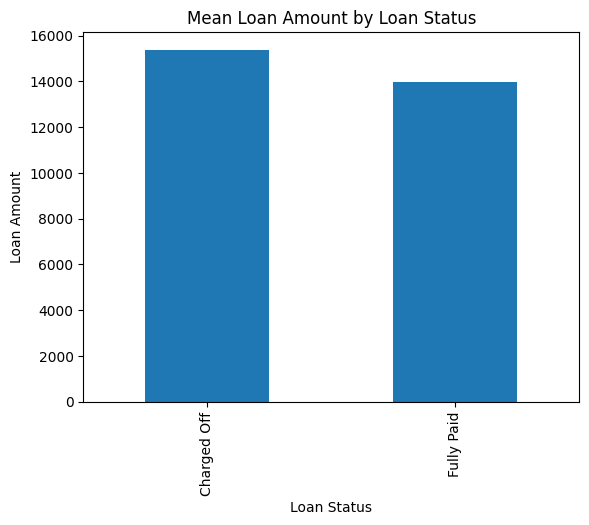

In [ ]:
df2['loan_amnt'].groupby(df2['loan_status']).mean().plot(kind = 'bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount by Loan Status')
plt.show()

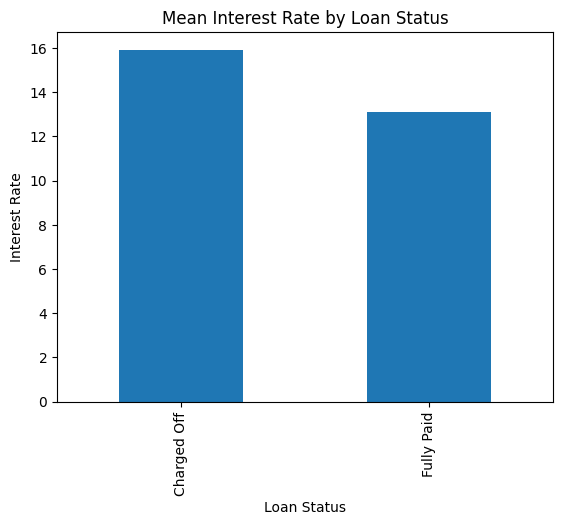

In [ ]:
df2['int_rate'].groupby(df2['loan_status']).mean().plot(kind = 'bar')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Mean Interest Rate by Loan Status')
plt.show()

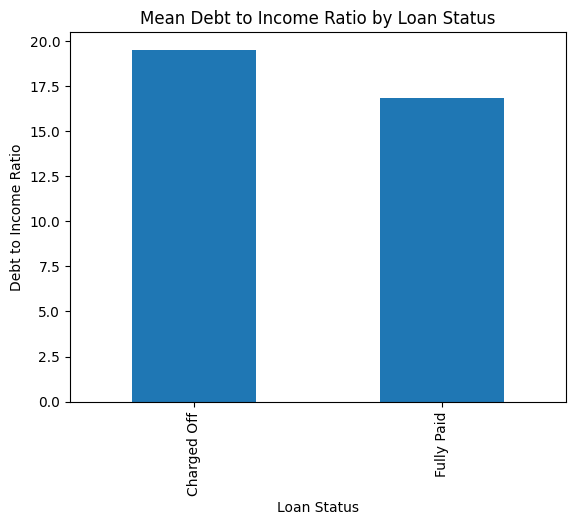

In [ ]:
df2['dti'].groupby(df2['loan_status']).mean().plot(kind = 'bar')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Mean Debt to Income Ratio by Loan Status')
plt.show()

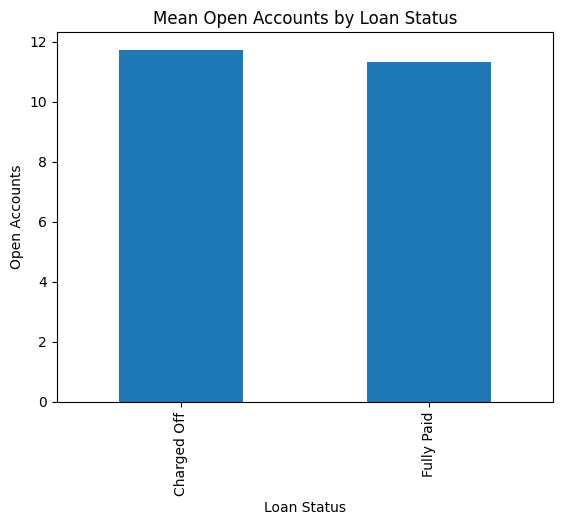

In [ ]:
df2['open_acc'].groupby(df2['loan_status']).mean().plot(kind = 'bar')
plt.xlabel('Loan Status')
plt.ylabel('Open Accounts')
plt.title('Mean Open Accounts by Loan Status')
plt.show()

Insights:

*   Defaulters has taken higher average loan amount, mean debt to income ratio is also high,higher mean interest rate,higher mean open account compare to individual who have paid the loans.These columns are very important for us to analysis for the machine learning model.

















##Heatmap

In [ ]:
col_heatmap = ['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util','open_acc','total_acc']

<Axes: >

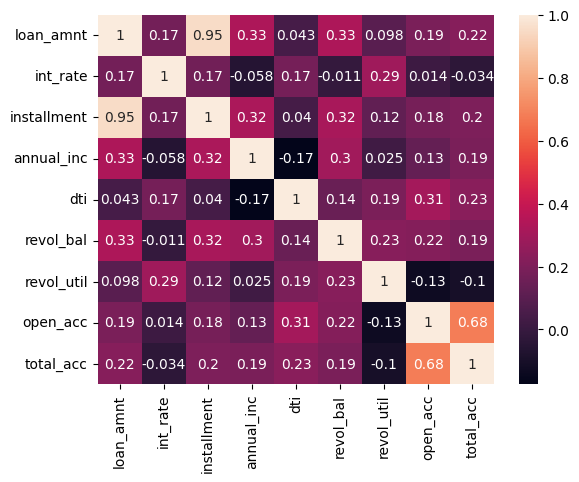

In [ ]:
sns.heatmap(df2[col_heatmap].corr(),annot = True)

Insights:

*   Column loan amount and installment are postively corelated. This was proven in above graphs also that is true right

















# Questionnaire 2) Comment about the correlation between Loan Amount and Installment features ?

Ans - There is high positive corelation between loan_amount and installment.grahp is

# Questionnaire 3) The majority of people have home ownership as ?

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,186218
RENT,150714
OWN,33555
OTHER,105
NONE,28
ANY,1


Ans - Majortiy of people who taken loan as home ownership in mortgage that means they are currently repaying home loans.

#Data Preprocessing

## Which column to drop off before doing machine learning model ?

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
(df3['application_type'].value_counts()/df3.shape[0])*100

,count
application_type,
INDIVIDUAL,99.849982
JOINT,0.083913
DIRECT_PAY,0.066105


Insights:

*   One category dominates other or feature is already inclined to one category we can easily dropp this column.

















In [ ]:
df3['emp_title'].value_counts()

,count
emp_title,
Teacher,4367
Manager,4231
Registered Nurse,1841
RN,1840
Supervisor,1812
...,...
Regional Counsel,1
Social Work/Care Manager,1
Director Bureau of Equipment Inventory,1


Insights:

*   17k unique emp title will only be a noise for the model and suppose if we even do one hot encoding it will create sparse data and unncessary too many columns which makes model hard to converge and also model will be overfitted that means training model preformance will be good but not on test performance.

















In [ ]:
df3['title'].value_counts()

,count
title,
Debt consolidation,144609
Credit card refinancing,48444
Home improvement,14209
Other,12018
Debt Consolidation,11166
...,...
Simplified Consolidation,1
LC-Money,1
Debt Consiladtion/Savings,1


Insights:

*   Same logic for this as well

















In [ ]:
df3['address'].value_counts()

,count
address,
USS Johnson\r\nFPO AE 48052,8
USS Smith\r\nFPO AP 70466,8
USNS Johnson\r\nFPO AE 05113,7
USNV Smith\r\nFPO AE 30723,6
USCGC Miller\r\nFPO AA 22690,6
...,...
Unit 2172 Box 9401\r\nDPO AP 22690,1
"7913 Misty Walks\r\nKimberlychester, CO 00813",1
"0266 Hudson Circles Apt. 176\r\nKatieland, FL 30723",1


Insights:

*   Same logic for this as well

















In [ ]:
df3['sub_grade'].value_counts()

,count
sub_grade,
B3,24960
B4,24017
C1,22134
C2,21193
B2,21071
B5,20678
C3,19840
C4,18973
B1,17940


Insights:

*   We are interested in grade column rather than sub grade column because subgrade column is just the part of grade column and they have many categories in it so it will only be a noise to the model and wont solve our purpose.
















In [ ]:
df3.drop(columns = ['emp_title','title','address','sub_grade'],inplace = True)

In [ ]:
df3.drop(columns = ['application_type'],inplace = True)

In [ ]:
df3.shape

(370621, 22)

##Chi-square test

In [ ]:
# null hypothesis term,emp_length,home ownership,verification status,purpose does not impact target column(Loan status)
# alternate hypothesis these columns does impact target column(loan status)

In [ ]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(index = df3['term'],columns = df3['loan_status'])
chi2, p, dof, exp_freq= chi2_contingency(ct)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("exp_freq:", exp_freq)

Chi2 Statistic: 11932.32506517272
p-value: 0.0
Degrees of Freedom: 1
exp_freq: [[ 53927.67509666 226556.32490334]
 [ 17330.32490334  72806.67509666]]


In [ ]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(index = df3['emp_length'],columns = df3['loan_status'])
chi2, p, dof, exp_freq= chi2_contingency(ct)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("exp_freq:", exp_freq)

Chi2 Statistic: 119.88609364432875
p-value: 5.336636028735578e-21
Degrees of Freedom: 10
exp_freq: [[ 4893.75905305 20559.24094695]
 [23723.57033735 99665.42966265]
 [ 6788.54534417 28519.45465583]
 [ 5971.41274779 25086.58725221]
 [ 4514.03272885 18963.96727115]
 [ 4993.54536305 20978.45463695]
 [ 3939.34818049 16549.65181951]
 [ 3932.04205374 16518.95794626]
 [ 3625.37699699 15230.62300301]
 [ 2898.03285297 12174.96714703]
 [ 5978.33434155 25115.66565845]]


In [ ]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(index = df3['home_ownership'],columns = df3['loan_status'])
chi2, p, dof, exp_freq= chi2_contingency(ct)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("exp_freq:", exp_freq)

Chi2 Statistic: 1680.422222460406
p-value: 0.0
Degrees of Freedom: 5
exp_freq: [[1.92266493e-01 8.07733507e-01]
 [3.58034818e+04 1.50414518e+05]
 [5.38346181e+00 2.26165382e+01]
 [2.01879818e+01 8.48120182e+01]
 [6.45150218e+03 2.71034978e+04]
 [2.89772523e+04 1.21736748e+05]]


In [ ]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(index = df3['verification_status'],columns = df3['loan_status'])
chi2, p, dof, exp_freq= chi2_contingency(ct)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("exp_freq:", exp_freq)

Chi2 Statistic: 2615.276964047343
p-value: 0.0
Degrees of Freedom: 2
exp_freq: [[ 23358.45626664  98131.54373336]
 [ 24076.57161899 101148.42838101]
 [ 23822.97211437 100083.02788563]]


In [ ]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(index = df3['purpose'],columns = df3['loan_status'])
chi2, p, dof, exp_freq= chi2_contingency(ct)
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("exp_freq:", exp_freq)

Chi2 Statistic: 1369.5390686768678
p-value: 5.5994052904228344e-285
Degrees of Freedom: 13
exp_freq: [[8.40973642e+02 3.53302636e+03]
 [1.49110356e+04 6.26429644e+04]
 [4.25412688e+04 1.78720731e+05]
 [4.36444940e+01 1.83355506e+02]
 [4.24274471e+03 1.78242553e+04]
 [3.96068976e+02 1.66393102e+03]
 [1.56716419e+03 6.58383581e+03]
 [7.32727606e+02 3.07827239e+03]
 [5.07199009e+02 2.13080099e+03]
 [3.73785290e+03 1.57031471e+04]
 [5.74876815e+01 2.41512319e+02]
 [9.14419442e+02 3.84158056e+03]
 [4.32215077e+02 1.81578492e+03]
 [3.33197833e+02 1.39980217e+03]]


Insights:

*  Chi square shows all the p value < 0.05 that means all the feature column mentioned above are dependent on target column and hence cant be remove from ML models















## Label encoding

In [ ]:
# Label encoding is good only when categories are 2 like feature column term and initial_list_status

In [ ]:
from sklearn.preprocessing import LabelEncoder
col_LE = ['term','initial_list_status']
label_encoder = LabelEncoder()
for i in col_LE:
  df3[i] = label_encoder.fit_transform(df3[i])


In [ ]:
df3['term'].value_counts()

,count
term,
0,280484
1,90137


Insights:

*   1 is assigned to term '60 months' whereas 0 is to term '36months'
















In [ ]:
df3['initial_list_status'].value_counts()

,count
initial_list_status,
0,222308
1,148313


Insights:

*   1 is assigned to term 'w'  whereas 0 is to term 'f'
















# Mapping

In [ ]:
emp_length_map = {'< 1 year' :0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}

df3['emp_length'] = df3['emp_length'].map(emp_length_map)

In [ ]:

df3['emp_length'].value_counts()

,count
emp_length,
10,123389
2,35308
0,31094
3,31058
5,25972
1,25453
4,23478
6,20489
7,20451


## One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
col_OHE = ['verification_status']
one_hot_encoder = OneHotEncoder(sparse_output=False,drop = 'first')
encoded_features = one_hot_encoder.fit_transform(df3[col_OHE])

In [ ]:
encoded_df = pd.DataFrame(
             encoded_features,
             columns = one_hot_encoder.get_feature_names_out(['verification_status']),
             index = df3.index) # preserves row alignment
# Merge with original DataFrame


In [ ]:
df4 = pd.concat([df3.drop(columns =['verification_status']),encoded_df],axis =1)

In [ ]:
df4.describe(include ='object')

,grade,home_ownership,issue_d,loan_status,purpose,earliest_cr_line
count,370621,370621,370621,370621,370621,370621
unique,7,6,111,2,14,664
top,B,MORTGAGE,Oct-2014,Fully Paid,debt_consolidation,Oct-2000
freq,108666,186218,14133,299363,221262,2861


In [ ]:
#Feature engineering

It is necessary to extract year and month from loan issuance date column to check seasionality or yearly defaulter

In [ ]:
df4['issue_d'] = pd.to_datetime(df4['issue_d'],format = '%b-%Y')

In [ ]:
df4['issue_month'] = df4['issue_d'].dt.month
df4['issue_year'] = df4['issue_d'].dt.year

We will create a column called credit_age_years which will show the individual credit history by years, this column will help us in knowing trend of defaulters and defaulter credit age.

In [ ]:
df4['earliest_cr_line'] =  pd.to_datetime(df4['earliest_cr_line'],format = '%b-%Y')

In [ ]:
df4['credit_age_years'] = df4['issue_year'] - df4['earliest_cr_line'].dt.year


We can now drop earliest_cr_line,issue_d and also change our target column to binary 1 and 0.

# Questionnaire 1) What percentage of customers have fully paid their Loan Amount?

In [ ]:
(df4['loan_status'].value_counts()/df4.shape[0])*100

,count
loan_status,
Fully Paid,80.773351
Charged Off,19.226649




*   Individuals who paid loan fully are 80% and defaulters are almost 20%




In [ ]:
# we will map loan_status column to binary
loan_status_map = {'Fully Paid':0,'Charged Off':1}
df4['loan_status'] = df4['loan_status'].map(loan_status_map)

In [ ]:
df4['loan_status'].value_counts()

,count
loan_status,
0,299363
1,71258


## Target encoding

Target encoding is good for high cardinality features.

In [ ]:
df5 = df4.copy()

In [ ]:
df5.drop(columns = ['earliest_cr_line','issue_d'],inplace = True)

In [ ]:
df5.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified',
       'issue_month', 'issue_year', 'credit_age_years'],
      dtype='object')

In [ ]:
df5.head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified,issue_month,issue_year,credit_age_years
0,10000.0,0,11.44,329.48,B,10,RENT,117000.0,0,vacation,...,41.8,25.0,1,0,0,0.0,0.0,1,2015,25
1,8000.0,0,11.99,265.68,B,4,MORTGAGE,65000.0,0,debt_consolidation,...,53.3,27.0,0,1,0,0.0,0.0,1,2015,11
2,15600.0,0,10.49,506.97,B,0,RENT,43057.0,0,credit_card,...,92.2,26.0,0,0,0,1.0,0.0,1,2015,8


In [ ]:
df5.describe(include ='object')

,grade,home_ownership,purpose
count,370621,370621,370621
unique,7,6,14
top,B,MORTGAGE,debt_consolidation
freq,108666,186218,221262


In [ ]:
df5.dtypes

,0
loan_amnt,float64
term,int64
int_rate,float64
installment,float64
grade,object
emp_length,int64
home_ownership,object
annual_inc,float64
loan_status,int64
purpose,object


In [ ]:
df6 = df5.copy()

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00


# Model Building

Logistic regression is suitable for binary classfication problem and here in our case study column of load_status is binary.

Lets split the data into train ,validation and test set

In [ ]:
df5.shape

(370621, 24)

In [ ]:
from sklearn.model_selection import train_test_split

x_tr_cv,x_test,y_tr_cv,y_test = train_test_split(df6.drop(columns=['loan_status'],axis=1),df6['loan_status'],test_size =.2,random_state = 42)
x_train,x_cv,y_train,y_cv = train_test_split(x_tr_cv,y_tr_cv,test_size =.25,random_state = 42)


In [ ]:
x_train.shape,x_cv.shape,x_test.shape

((222372, 23), (74124, 23), (74125, 23))

In [ ]:
from category_encoders import TargetEncoder
col_TE = ['purpose','home_ownership','grade']
encoder = TargetEncoder(cols = col_TE)
encoder.fit(x_train,y_train)
x_train = encoder.transform(x_train)
x_cv =  encoder.transform(x_cv)
x_test = encoder.transform(x_test)

Now all the columns are numerical but are in different range and machine learning model will get biased towards a larger quanitity and we dont want biases between our features so to normalize we use standard scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 1.16081421, -0.56680484,  0.37497438, ..., -1.04698911,
         1.62458596,  0.79043931],
       [-0.7727659 , -0.56680484, -0.14351188, ...,  1.00231168,
        -0.43428438, -0.21858233],
       [-1.40535692, -0.56680484,  1.30467388, ..., -0.4614746 ,
         0.25200573,  2.95262853],
       ...,
       [ 0.08660304, -0.56680484, -0.06752682, ...,  1.00231168,
         0.93829585,  0.50214741],
       [ 1.09516797, -0.56680484, -0.14351188, ...,  1.00231168,
         0.25200573,  0.50214741],
       [ 0.08660304, -0.56680484, -0.99722633, ..., -0.4614746 ,
         0.93829585,  0.50214741]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print('coeff' , model.coef_)
print('intercept',model.intercept_)

coeff [[ 0.01860996  0.20435503  0.10127282  0.04497065  0.34919392 -0.01966972
   0.11849598 -0.16168967  0.05904487  0.20106842  0.11489377  0.06378163
  -0.06416967  0.08763012 -0.11021788 -0.01775534 -0.04692878 -0.04459815
   0.06703645  0.02486718 -0.01833234  0.08959984 -0.00903796]]
intercept [-1.61002782]


Finding whether the target column data is balance or imbalance.

In [ ]:
(df5['loan_status'].value_counts()/df5.shape[0])*100

,count
loan_status,
0,80.773351
1,19.226649


Target column is imbalanced and hence needs to use techniques to get it balanced.

In [ ]:
print("Training_accuracy",model.score(x_train,y_train))
print("CV_accuracy", model.score(x_cv,y_cv))

Training_accuracy 0.8099221124961776
CV_accuracy 0.8095218822513626


This accuracy is misleading because the target column is imbalanced. Model is giving importanct to majority side.

In [ ]:
#making all the train ,validation and test set as df
feature_names = encoder.get_feature_names_out()
x_train_df = pd.DataFrame(x_train,columns = feature_names)

In [ ]:
feature_names

array(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'verification_status_Source Verified',
       'verification_status_Verified', 'issue_month', 'issue_year',
       'credit_age_years'], dtype=object)

We will first check the VIF i.e multicollinearity in the dataframe. This helps in feature interpretability and remove redundant feature

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = x_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_df.values,i) for i in range(x_train_df.shape[1])]
print(vif_data)

                                feature        VIF
0                             loan_amnt  58.950837
1                                  term   6.800098
2                              int_rate  11.543196
3                           installment  51.365355
4                                 grade  10.865377
5                            emp_length   1.101765
6                        home_ownership   1.685290
7                            annual_inc   1.288938
8                               purpose   1.039242
9                                   dti   1.332787
10                             open_acc   2.093675
11                              pub_rec   4.094608
12                            revol_bal   1.349626
13                           revol_util   1.305558
14                            total_acc   2.181144
15                  initial_list_status   1.270537
16                             mort_acc   1.923897
17                 pub_rec_bankruptcies   4.046520
18  verification_status_Source 

VIF of loan_amount and installement are decently high and taking both feature for ML model will only create noise so dropping off one of the feature is required, here in this case we will drop loan_amount feature.

For a credit risk model installment and term are useful as it inherently captures payment burden.

Threshold we are keeping at 10 as of now.

In [ ]:
# making df of CV set
x_cv_df = pd.DataFrame(x_cv,columns = feature_names)

In [ ]:
#making df of test set
x_test_df = pd.DataFrame(x_test,columns = feature_names)

In [ ]:
#dropping loan amount column from all 3 set
x_test_df.drop(columns = ['loan_amnt'],inplace = True)
x_cv_df.drop(columns = ['loan_amnt'],inplace = True )
x_train_df.drop(columns = ['loan_amnt'],inplace = True )

Target column data is imbalance and hence we have to use techinque called as SMOTE and class weight to make it balance.

## Case 1:- Imbalance data(Target column)

In [ ]:
#imbalance data and l2 ridge parameter
model_reg_imb = LogisticRegression(penalty = 'l2',solver = 'liblinear')

In [ ]:
model_reg_imb.fit(x_train_df,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model_reg_imb.score(x_train_df,y_train)

0.8098816397747918

In [ ]:
model_reg_imb.score(x_cv_df,y_cv)

0.8094139549943338

In [ ]:
# lets change hyperparameter tuning lambda rate

## Hyperparameter Tuning C

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
# with l2(ridge) regularization
train_score = []
cv_score = []
lambda_rate = [0.01,0.1,1,10,100,1000]

for lam in lambda_rate:
  model_ridge_tune = make_pipeline(LogisticRegression(penalty ='l2',solver = 'liblinear',C=1/lam))
  model_ridge_tune.fit(x_train_df,y_train)
  train_score.append(model_ridge_tune.score(x_train_df,y_train))
  cv_score.append(model_ridge_tune.score(x_cv_df,y_cv))

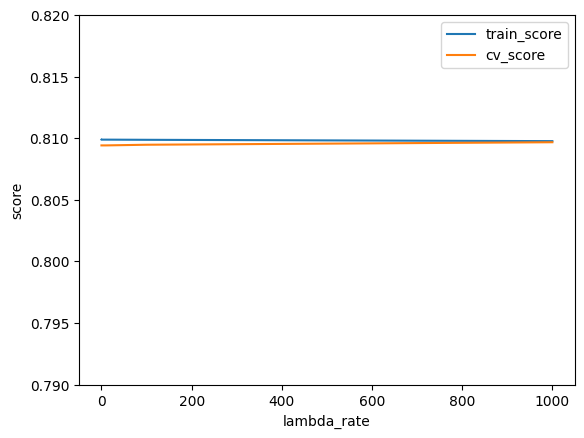

In [ ]:
plt.figure()
plt.plot(lambda_rate,train_score)
plt.plot(lambda_rate,cv_score)
plt.legend(['train_score','cv_score'])
plt.ylim(.79,.82)
plt.xlabel('lambda_rate')
plt.ylabel('score')
plt.show()

In [ ]:
#with l1 regularization
train_score2 = []
cv_score2 = []
lambda_rate2 = [0.01,0.1,1,10,100,1000]

for lam in lambda_rate:
  model_lasso_tune2 = make_pipeline(LogisticRegression(penalty ='l1',solver = 'liblinear',C=1/lam))
  model_lasso_tune2.fit(x_train_df,y_train)
  train_score2.append(model_lasso_tune2.score(x_train_df,y_train))
  cv_score2.append(model_lasso_tune2.score(x_cv_df,y_cv))

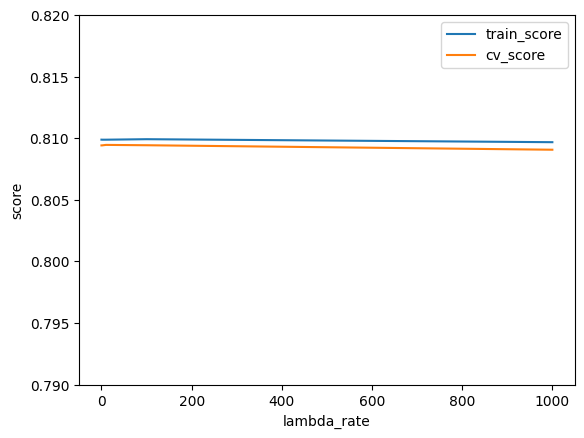

In [ ]:
plt.figure()
plt.plot(lambda_rate2,train_score2)
plt.plot(lambda_rate2,cv_score2)
plt.legend(['train_score','cv_score'])
plt.ylim(.79,.82)
plt.xlabel('lambda_rate')
plt.ylabel('score')
plt.show()

Adding L2 ,l2 regularization is not helping in any way we can stick to C=1.

l1 and l2 Regularization is not affecting performance.

In [ ]:
#with elastic net regularization
train_score3 = []
cv_score3 = []
lambda_rate3 = [0.01,0.1,1,10,100,1000]

for lam in lambda_rate:
  model_lasso_tune3 = make_pipeline(LogisticRegression(penalty ='elasticnet',l1_ratio= .5,solver = 'saga',C=1/lam))
  model_lasso_tune3.fit(x_train_df,y_train)
  train_score3.append(model_lasso_tune3.score(x_train_df,y_train))
  cv_score3.append(model_lasso_tune3.score(x_cv_df,y_cv))

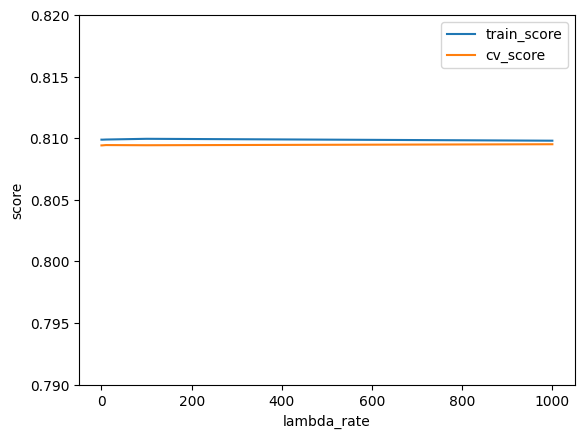

In [ ]:
plt.figure()
plt.plot(lambda_rate3,train_score3)
plt.plot(lambda_rate3,cv_score3)
plt.legend(['train_score','cv_score'])
plt.ylim(.79,.82)
plt.xlabel('lambda_rate')
plt.ylabel('score')
plt.show()

## AU ROC curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report

In [ ]:
#without regularization
AU_roc_model = make_pipeline(LogisticRegression(penalty = None,solver = 'saga',max_iter = 5000))
AU_roc_model.fit(x_train_df,y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(max_iter=5000, penalty=None,
                                    solver='saga'))])

In [ ]:
# finding probablity of defaulter for train

In [ ]:
#train data probablity
AU_roc_train_prob = AU_roc_model.predict_proba(x_train_df)[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_train,AU_roc_train_prob)
# fpr ,tpr,thr order matters

In [ ]:
roc_curve(y_train, AU_roc_train_prob)

(array([0.00000000e+00, 5.56405620e-06, 2.22562248e-05, ...,
        9.99988872e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99997655, 0.99997655,
        1.        ]),
 array([           inf, 8.64698836e-01, 7.72469556e-01, ...,
        7.53857730e-09, 2.15089338e-10, 2.36083476e-11]))

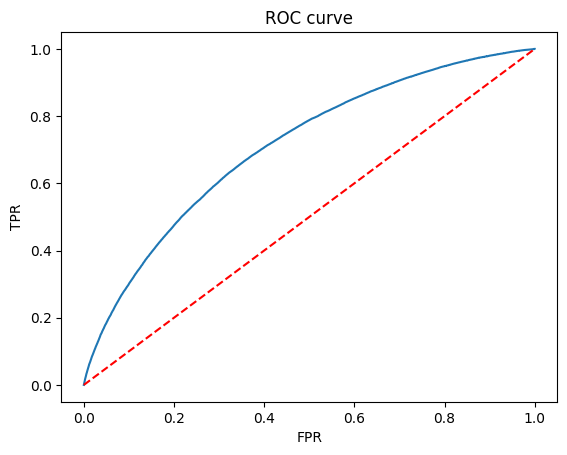

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
#train auc_Score
roc_auc_score(y_train,AU_roc_train_prob)

np.float64(0.7101843687080217)

In [ ]:
#cv data probablity
au_roc_cv_prob = AU_roc_model.predict_proba(x_cv_df)[:,1]
fpr_cv, tpr_cv, thr_cv = roc_curve(y_cv,au_roc_cv_prob)

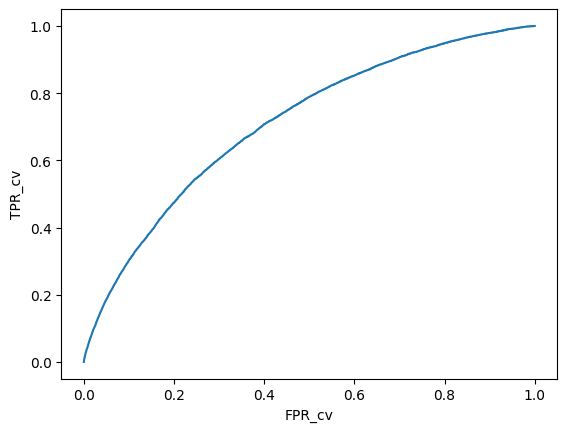

In [ ]:
#plot cv
plt.plot(fpr_cv,tpr_cv)
plt.xlabel('FPR_cv')
plt.ylabel('TPR_cv')
plt.show()

In [ ]:
#cv auc_score
roc_auc_score(y_cv,au_roc_cv_prob)

np.float64(0.7101102996691373)

## Confusion matrix

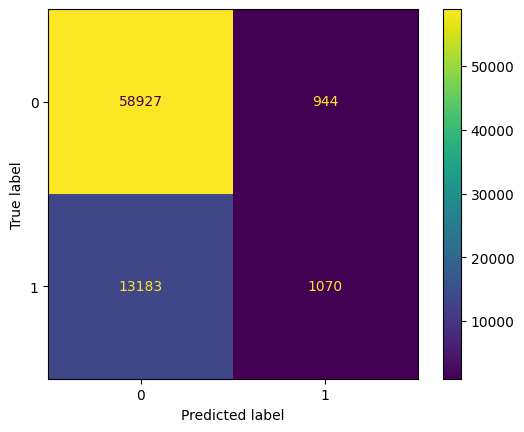

In [ ]:
#confusion matrix
#cv data
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix1 = confusion_matrix(y_cv,AU_roc_model.predict(x_cv_df))
ConfusionMatrixDisplay(conf_matrix1).plot()


In [ ]:
np.diag(conf_matrix1).sum() / conf_matrix1.sum()
#accuracy

np.float64(0.8094139549943338)

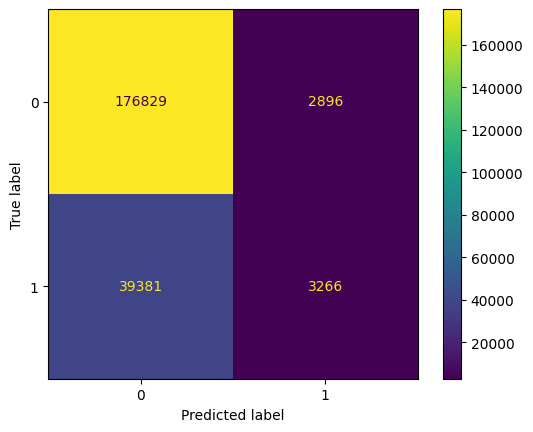

In [ ]:
#confusion matrix
#train data
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_train,AU_roc_model.predict(x_train_df))
ConfusionMatrixDisplay(conf_matrix2).plot()


In [ ]:
np.diag(conf_matrix2).sum() / conf_matrix2.sum()
#accuracy

np.float64(0.8098816397747918)

In [ ]:
#classification report
#cv data
from sklearn.metrics import classification_report
print(classification_report(y_cv,AU_roc_model.predict(x_cv_df)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     59871
           1       0.53      0.08      0.13     14253

    accuracy                           0.81     74124
   macro avg       0.67      0.53      0.51     74124
weighted avg       0.76      0.81      0.75     74124



In [ ]:
#train data
from sklearn.metrics import classification_report
print(classification_report(y_train,AU_roc_model.predict(x_train_df)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89    179725
           1       0.53      0.08      0.13     42647

    accuracy                           0.81    222372
   macro avg       0.67      0.53      0.51    222372
weighted avg       0.76      0.81      0.75    222372




*   We got AU ROC score of 70% for train data and CV data and f1 score of 0.13  which shows it is performing well with AU ROC metric  but not on f1 score.
*   ROC metric is wrong for an imbalance data(target column) because it can make a poor model on the minority class appear better
 - by focusing more on the performance on the majority class


# Questionnaire Q6)- Thinking from a bank's perspective, which metric should our primary focus be on.?



*   Precision :_In our LoanTap case study we require that model can detect individuals who cannot pay loan and also not miss any individual who can pay the loan amount but model predicted defaulter (False positive).A metric to use for this is Precision. This is very useful for controlling NPA.

*   Recall :- For finance company like issuing loan, model shouldn't miss any opportunity for providing loans to customer. Consider recall value is important for this case.

*   AU ROC :- ROC metric is wrong for an imbalance data(target column) because it can make a poor model on the minority class appear better by focusing more on the performance on the majority class.



*   F1_score:-  This is the best metric for our case because for finance company both precision and recall is important ,f1_score is good trade off.





## Precision Recal curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision,recall,thr = precision_recall_curve(y_train,AU_roc_train_prob)
#unpacking order is important

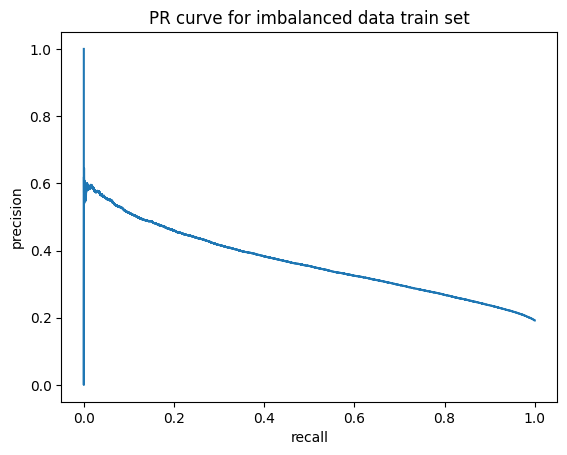

In [ ]:
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve for imbalanced data train set')
plt.show()

In [ ]:
auc(recall,precision)

np.float64(0.3647552146586025)



*   AU PRC score(.36) has performed well in comparision with F1 score(.13) this shows PRC score works well on imbalanced data but this score is very low so to improve the performance we will balanced the data




## Case 2 :- Balanced data(Target column)

Method 1:- Giving more class weightage

In [ ]:
#minority class needs more weightage

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,299363
Charged Off,71258


In [ ]:
# weightage required is 4.21 i.e 299363/71258

In [ ]:
model_2 =  LogisticRegression(class_weight = {0:1,1:4.21})
model_2.fit(x_train_df,y_train)

LogisticRegression(class_weight={0: 1, 1: 4.21})

In [ ]:
# now want to find f1 score of train and cv data

In [ ]:
#classification report
#cv data
from sklearn.metrics import classification_report
print(classification_report(y_cv,model_2.predict(x_cv_df)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     59871
           1       0.32      0.64      0.42     14253

    accuracy                           0.66     74124
   macro avg       0.60      0.65      0.59     74124
weighted avg       0.78      0.66      0.70     74124



In [ ]:
# train data
from sklearn.metrics import classification_report
print(classification_report(y_train,model_2.predict(x_train_df)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76    179725
           1       0.32      0.64      0.42     42647

    accuracy                           0.66    222372
   macro avg       0.60      0.65      0.59    222372
weighted avg       0.78      0.66      0.70    222372





*   F1 score has now to increased from .13 to .42 which shows balanced data has improved our model performance.




In [ ]:
# precision recall curve
# train set
precision_2,recall_2,thr_2 = precision_recall_curve(y_train,model_2.predict_proba(x_train_df)[:,1])

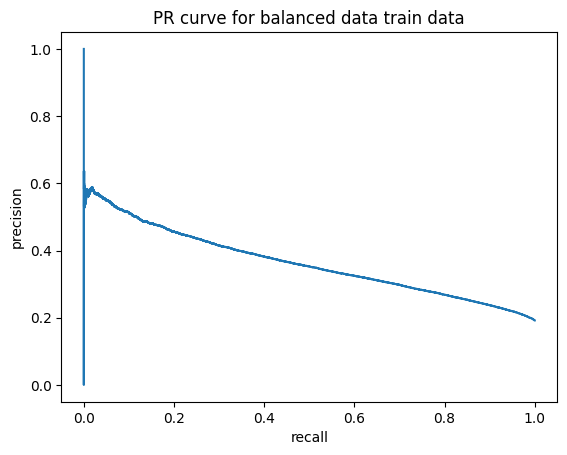

In [ ]:
plt.plot(recall_2,precision_2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for balanced data train data")
plt.show()

AU PRC score(Balanced data by Class weight method)

In [ ]:
auc(recall_2,precision_2)

np.float64(0.36333816953685966)

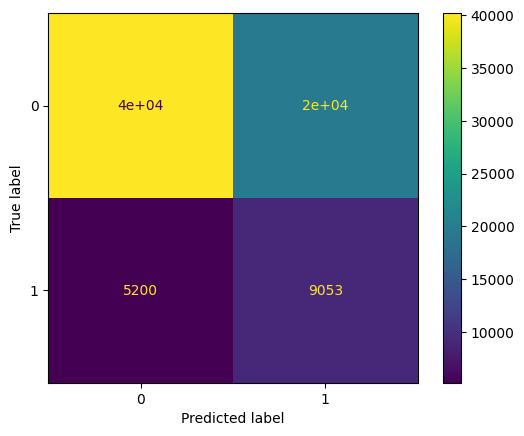

In [ ]:
#Confusion matrix
#cv data
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix3 = confusion_matrix(y_cv,model_2.predict(x_cv_df))
ConfusionMatrixDisplay(conf_matrix3).plot()

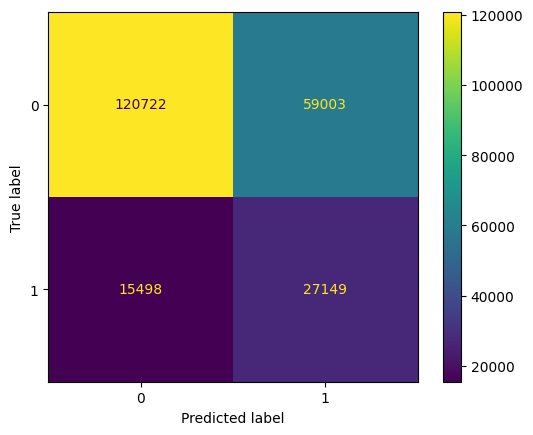

In [ ]:
#train data
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix4 = confusion_matrix(y_train,model_2.predict(x_train_df))
ConfusionMatrixDisplay(conf_matrix4).plot()

Method 2:- Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()
print("before mote", y_train.value_counts())
x_sm,y_sm = smt.fit_resample(x_train_df,y_train)
print("after oversampling", y_sm.value_counts())

before mote loan_status
0    179725
1     42647
Name: count, dtype: int64
after oversampling loan_status
0    179725
1    179725
Name: count, dtype: int64


In [ ]:
x_sm.shape,y_sm.shape

((359450, 22), (359450,))

In [ ]:
model_3 = LogisticRegression()
model_3.fit(x_sm,y_sm)

LogisticRegression()

In [ ]:
# cv data
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_cv,model_3.predict(x_cv_df)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     59871
           1       0.31      0.64      0.42     14253

    accuracy                           0.66     74124
   macro avg       0.60      0.65      0.59     74124
weighted avg       0.78      0.66      0.70     74124



In [ ]:
#train data
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,model_3.predict(x_train_df)))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76    179725
           1       0.31      0.64      0.42     42647

    accuracy                           0.66    222372
   macro avg       0.60      0.65      0.59    222372
weighted avg       0.78      0.66      0.70    222372



In [ ]:
# precision recall curve
# on CV set
precision_3,recall_3,thr_3 = precision_recall_curve(y_cv,model_3.predict_proba(x_cv_df)[:,1])

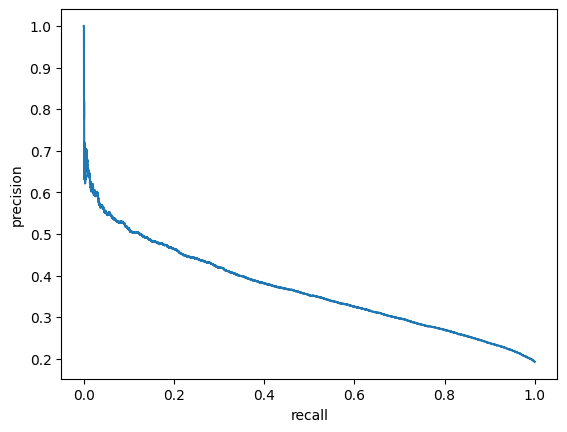

In [ ]:
#plot
plt.plot(recall_3,precision_3)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

AU PRC score(Balanced data by Class weight method)

In [ ]:
auc(recall_3,precision_3)

np.float64(0.36678004411010323)

AU PRC score for balanced and imbalanced data are same that shows PRC works same way for imbalanced data as well.

In [ ]:
#coeffiecnt of features
pd.DataFrame(model_3.coef_,columns = x_sm.columns)

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,dti,open_acc,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified,issue_month,issue_year,credit_age_years
0,0.213923,0.176274,0.072008,0.294924,-0.004338,0.120954,-0.222581,0.078696,0.211233,0.144028,...,0.106539,-0.147593,-0.013202,-0.015994,-0.036252,0.070343,0.019633,-0.02082,0.085882,-0.039619




*   term (+0.22): longer-term loans raise default odds.


*   grade (+0.29): lower grades (worse credit) sharply up default risk.


*    emp_length (-0.01): more experience slightly lowers risk

*   annual_inc (~-0.24): higher income actually reduces default probability in the balanced fit






# Questionnaire 8)- Which were the features that heavily affected the outcome?

Ans-) By looking at weightage of column we can say grade is the feature column which affected target features.

In [ ]:
# Recheck with removing columns with more VIF with model_3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data2 = pd.DataFrame()
vif_data2["feature"] = x_sm.columns
vif_data2["VIF"] = [variance_inflation_factor(x_sm.values,i) for i in range(x_sm.shape[1])]
print(vif_data2)


                                feature        VIF
0                                  term   1.489911
1                              int_rate  12.702323
2                           installment   1.418844
3                                 grade  12.722985
4                            emp_length   1.100701
5                        home_ownership   1.754336
6                            annual_inc   1.290212
7                               purpose   1.049430
8                                   dti   1.372318
9                              open_acc   2.184986
10                              pub_rec   3.998193
11                            revol_bal   1.350914
12                           revol_util   1.303183
13                            total_acc   2.301632
14                  initial_list_status   1.261134
15                             mort_acc   1.976859
16                 pub_rec_bankruptcies   3.956310
17  verification_status_Source Verified   1.591795
18         verification_status_

Removing features having high i.e VIF>10.

In this code we are dropping one by one high VIF feature like int_rate and grade and checking the F1 score.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd

# List of high-VIF features to consider removing
high_vif_features = ['int_rate', 'grade']
base_features = x_train_df.columns.tolist()
results = []

for i in range(len(high_vif_features) + 1):
    # Drop features one by one
    features_to_use = [f for f in base_features if f not in high_vif_features[:i]]

    # Use scaled training data with selected features
    x_train_sub = x_train_df[features_to_use]
    x_cv_sub = x_cv_df[features_to_use]
    x_test_sub = x_test_df[features_to_use]

    # Apply SMOTE
    smt = SMOTE(random_state=42)
    x_sm, y_sm = smt.fit_resample(x_train_sub, y_train)

    # Train the model
    model = LogisticRegression(solver='liblinear')
    model.fit(x_sm, y_sm)

    # Predict and calculate F1
    y_pred = model.predict(x_cv_sub)
    f1 = f1_score(y_cv, y_pred)

    # Store results
    results.append({
        'Dropped': high_vif_features[:i],
        'F1': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

             Dropped        F1
0                 []  0.420421
1         [int_rate]  0.420216
2  [int_rate, grade]  0.400591




*   After dropping these features,F1_score has dropped which means we should keep these feature.
*   Multicollinearity is not hurting model performance.



# Questionnaire 7)- How does the gap in precision and recall affect the bank?.?

Ans:-) **Low Precision** (**many false positives)**
The bank mistakenly flags many good customers as defaulters.

**Consequences:**

* Loan rejections or unfavorable terms for creditworthy applicants.

* Loss of business opportunities and customer trust.

*  Increased churn and bad word-of-mouth.

**Low Recall (many false negatives)**
The model fails to detect true defaulters.

**Consequences:**

* High-risk borrowers get approved, leading to more loan defaults.

* This directly increases non-performing assets (NPAs) and financial losses.

* Long-term impact on profitability and capital reserves.

## Finding the best threshold for f1 score

In [ ]:
y_proba = model_3.predict_proba(x_cv_df)[:, 1]


In [ ]:
thresholds = np.linspace(0.0, 1.0, 101)
f1_scores_3 = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)

    # Only compute F1 if there are some positive predictions
    if y_pred_thresh.sum() > 0:
        score = f1_score(y_cv, y_pred_thresh)
    else:
        score = 0.0  # or you can skip appending

    f1_scores_3.append(score)


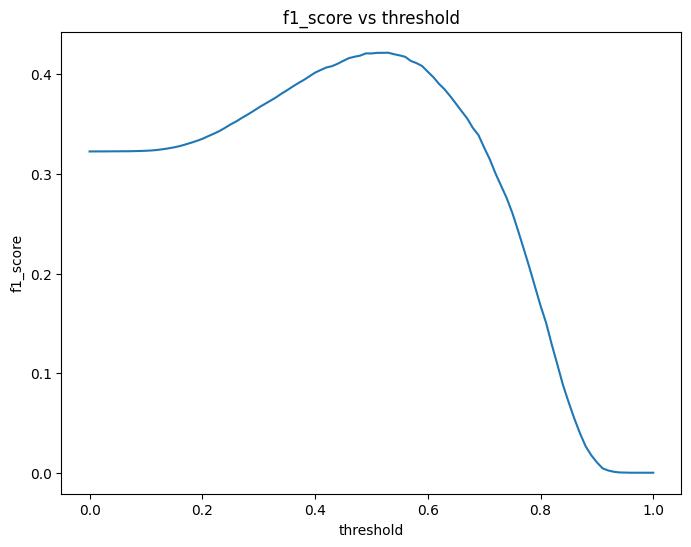

In [ ]:
#plot threshold and f1 score
plt.figure(figsize =(8,6))
plt.plot(thresholds,f1_scores_3)
plt.xlabel('threshold')
plt.title('f1_score vs threshold')
plt.ylabel('f1_score')
plt.show()

From the graph we can see the threshold of .5 gives almost a maximum f1_score i.e .42. So our calculation above was for threshold .5 by default.

So anymore tuning in threshold wont increase our F1 score.

# Final Result ?(Test set)

In [ ]:
#test set data
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,model_3.predict(x_test_df)))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     59767
           1       0.32      0.64      0.42     14358

    accuracy                           0.66     74125
   macro avg       0.60      0.65      0.59     74125
weighted avg       0.77      0.66      0.70     74125



In [ ]:
# precision recall curve
# on test set
precision_4,recall_4,thr_4 = precision_recall_curve(y_test,model_3.predict_proba(x_test_df)[:,1])

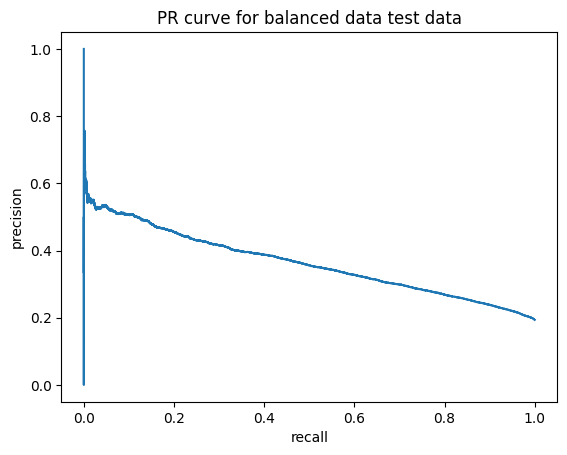

In [ ]:
#plot PR curve
plt.plot(recall_4,precision_4)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("PR curve for balanced data test data")
plt.show()

In [ ]:
# au PRC score test set
auc(recall_4,precision_4)


np.float64(0.36280138709551607)

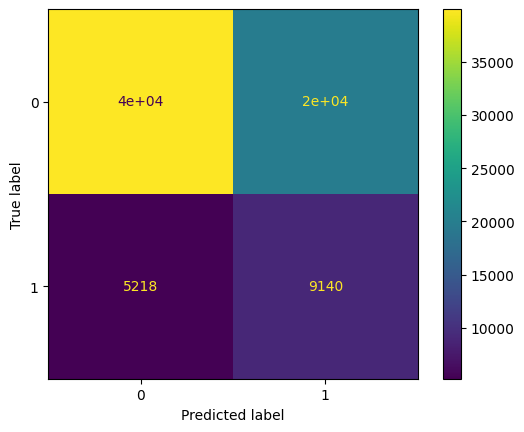

In [ ]:
# confusion matrix for test set
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix5 = confusion_matrix(y_test,model_3.predict(x_test_df))
ConfusionMatrixDisplay(conf_matrix5).plot()

**Conclusion**
Based on Evaluation Metrics

* Overall Accuracy = 66% The model correctly classifies 66% of the total loan cases. While decent, this metric alone isn’t reliable due to class imbalance.

**Class-Wise Performance**:

Class 0 ("Fully Paid")

* Precision: 0.88 → High confidence in predicting this class.

* Recall: 0.67 → Captures two-thirds of actual fully paid loans.

* F1-Score: 0.76 → Strong, balanced performance on this majority class.

Class 1 ("Charged Off")

* Precision: 0.32 → For every predicted default, only 32% were actually defaults.

* Recall: 0.64 → The model detects 64% of true defaulters, which is good.

* F1-Score: 0.42 → Major improvement from 0.13 (imbalanced) to 0.42 after SMOTE, showing better handling of the minority class.

* Macro Avg (0.59 F1) Averages metrics equally across both classes, giving a sense of how balanced the model is across outcomes.

* Weighted Avg (0.70 F1) Adjusted for support (class distribution), it reflects how the model performs on the dataset as a whole.

# Trial 2


In [ ]:
df_T2 = pd.read_csv('logistic_regression.csv')

We have remove outliers and have dropped many unnecessary columns and also dropped date time column


In [ ]:
df_T2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df_T2.select_dtypes(include = ['int64','float64'])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


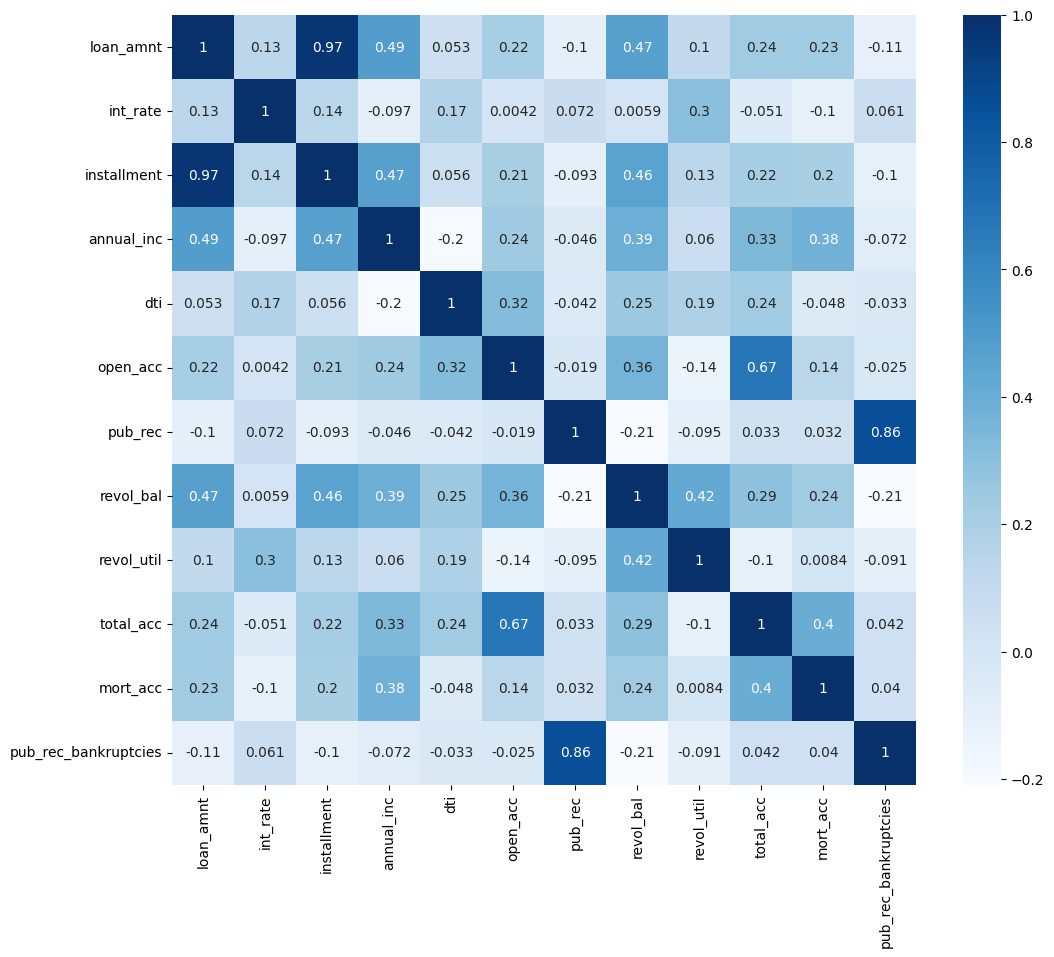

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_T2.select_dtypes(include = ['int64','float64']).corr(method ='spearman'),annot = True,cmap = 'Blues')
plt.show()

In [ ]:
df_T2.drop(columns = ['installment'],axis =1,inplace = True)

In [ ]:
df_T2['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


In [ ]:
df_T2.drop(columns = ['application_type'],axis=1,inplace = True)

In [ ]:
df_T2['pub_rec'] = df_T2['pub_rec'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df_T2['pub_rec_bankruptcies'] = df_T2['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df_T2.drop(columns = ['emp_title','title','address','sub_grade'],inplace = True)

In [ ]:
df_T2.drop(columns = ['earliest_cr_line','issue_d'],inplace = True)

In [ ]:
emp_length_map = {'< 1 year' :0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
df_T2['emp_length'] = df_T2['emp_length'].map(emp_length_map)

In [ ]:
loan_status_map = {'Fully Paid':0,'Charged Off':1}
df_T2['loan_status'] = df_T2['loan_status'].map(loan_status_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder
col_LE = ['term','initial_list_status']
label_encoder = LabelEncoder()
for i in col_LE:

  df_T2[i] = label_encoder.fit_transform(df_T2[i])

In [ ]:
df_T2['term'].value_counts()

,count
term,
0,302005
1,94025


In [ ]:
from sklearn.preprocessing import OneHotEncoder
col_OHE = ['verification_status']
one_hot_encoder = OneHotEncoder(sparse_output=False,drop = 'first')
encoded_features = one_hot_encoder.fit_transform(df_T2[col_OHE])

In [ ]:
df['verification_status'].value_counts()

,count
verification_status,
Source Verified,125225
Verified,123906
Not Verified,121490


In [ ]:
encoded_df = pd.DataFrame(
encoded_features,columns = one_hot_encoder.get_feature_names_out(['verification_status']),
index = df_T2.index) # preserves row alignment

# Merge with original DataFrame

In [ ]:
df_T2 = pd.concat([df_T2.drop(columns =['verification_status']),encoded_df],axis =1)

In [ ]:
df_T2.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [ ]:
df_T2.head(2)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified
0,10000.0,0,11.44,B,10.0,RENT,117000.0,0,vacation,26.24,16.0,0,36369.0,41.8,25.0,1,0.0,0,0.0,0.0
1,8000.0,0,11.99,B,4.0,MORTGAGE,65000.0,0,debt_consolidation,22.05,17.0,0,20131.0,53.3,27.0,0,3.0,0,0.0,0.0


In [ ]:
df_T2.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
emp_length,18301
home_ownership,0
annual_inc,0
loan_status,0
purpose,0
dti,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_T2['mort_acc'] = pd.DataFrame(imputer.fit_transform(df_T2[['mort_acc']]))
df_T2['emp_length'] = pd.DataFrame(imputer.fit_transform(df_T2[['emp_length']]))

In [ ]:
np.round((df_T2.isna().sum()/len(df_T2))*100,2)

,0
loan_amnt,0.00
term,0.00
int_rate,0.00
grade,0.00
emp_length,0.00
home_ownership,0.00
annual_inc,0.00
loan_status,0.00
purpose,0.00
dti,0.00


In [ ]:
df_T2.dropna(inplace = True)

In [ ]:
df_T2.select_dtypes(include = ['int64','float64']).columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [ ]:
num_cols2 = df_T2[['loan_amnt', 'int_rate', 'annual_inc',
        'dti', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc']]


In [ ]:
num_cols = num_cols2.columns

In [ ]:
num_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

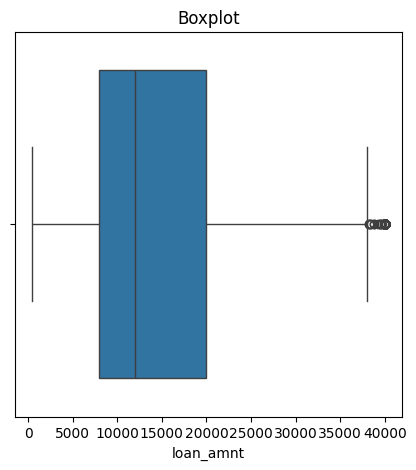

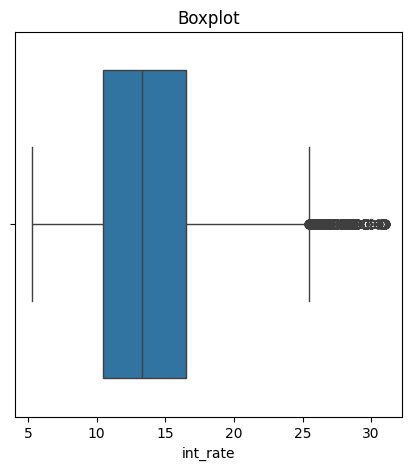

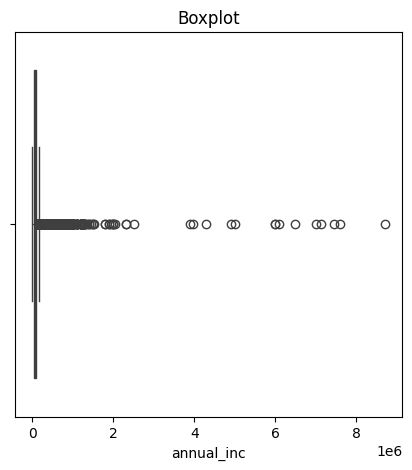

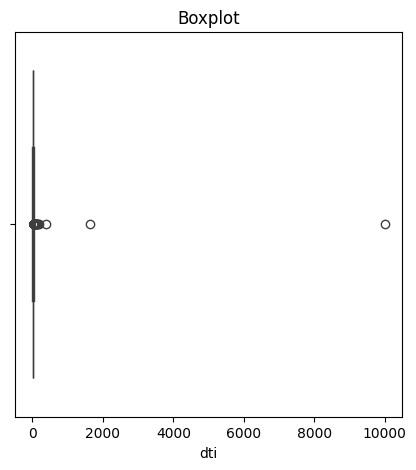

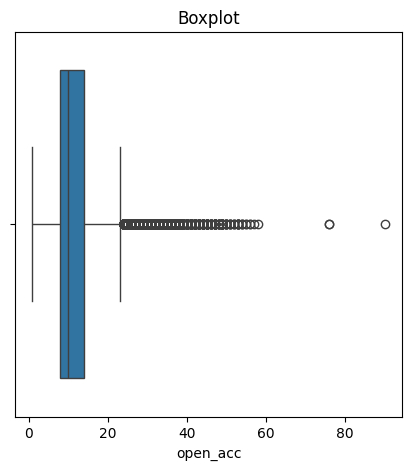

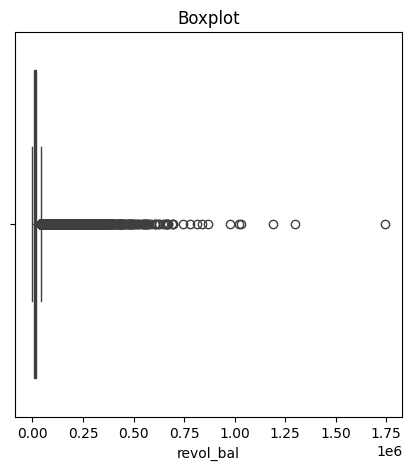

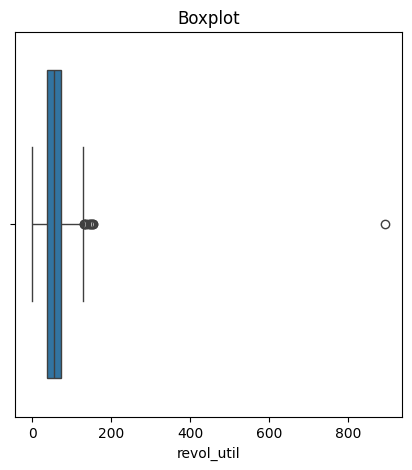

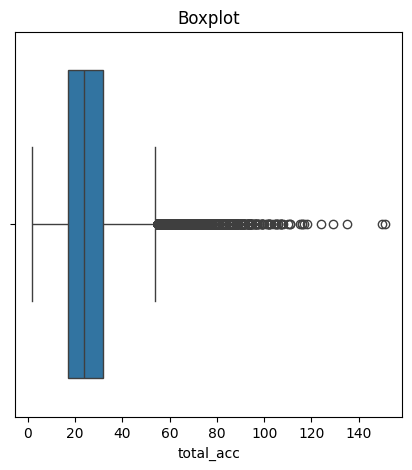

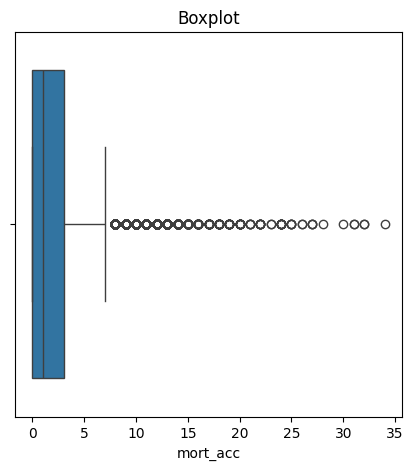

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def boxplot(col):
  plt.figure(figsize =(5,5))
  sns.boxplot(x = df_T2[col])
  plt.title('Boxplot')
  plt.show()

for col in num_cols:
  boxplot(col)

In [ ]:
for col in num_cols:
  mean = df_T2[col].mean()
  std = df_T2[col].std()

  upper_limit = mean + 3*std
  lower_limit = mean - 3*std

  df_T2 = df_T2[(df_T2[col] > lower_limit) & (df_T2[col] < upper_limit)]

In [ ]:
df_T2.shape

(372761, 20)

In [ ]:
df_T2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372761 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            372761 non-null  float64
 1   term                                 372761 non-null  int64  
 2   int_rate                             372761 non-null  float64
 3   grade                                372761 non-null  object 
 4   emp_length                           372761 non-null  float64
 5   home_ownership                       372761 non-null  object 
 6   annual_inc                           372761 non-null  float64
 7   loan_status                          372761 non-null  int64  
 8   purpose                              372761 non-null  object 
 9   dti                                  372761 non-null  float64
 10  open_acc                             372761 non-null  float64
 11  pub_rec           

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split
x_tr_cv,x_test,y_tr_cv,y_test = train_test_split(df_T2.drop(columns=['loan_status'],axis=1),df_T2['loan_status'],test_size =.2,random_state = 42)
x_train,x_cv,y_train,y_cv = train_test_split(x_tr_cv,y_tr_cv,test_size =.25,random_state = 42)

In [ ]:
x_train.shape,x_cv.shape,x_test.shape

((223656, 19), (74552, 19), (74553, 19))

In [ ]:
from category_encoders import TargetEncoder
col_TE = ['purpose','home_ownership','grade']
encoder = TargetEncoder(cols = col_TE)
encoder.fit(x_train,y_train)
x_train = encoder.transform(x_train)
x_cv = encoder.transform(x_cv)
x_test = encoder.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
print('coeff' , model.coef_)
print('intercept',model.intercept_)

coeff [[ 0.09893888  0.17318256  0.05887873  0.38219352  0.01496876  0.11624718
  -0.18358398  0.05898551  0.1894313   0.12804293  0.08144268 -0.06829694
   0.10256322 -0.10753661  0.00997663 -0.02680499 -0.06035824  0.10105776
   0.06164795]]
intercept [-1.56068661]


In [ ]:
print("Training_accuracy",model.score(x_train_scaled,y_train))
print("CV_accuracy", model.score(x_cv_scaled,y_cv))

Training_accuracy 0.803752190864542
CV_accuracy 0.8042708445112137


In [ ]:
y_pred = model.predict(x_test_scaled)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.804


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


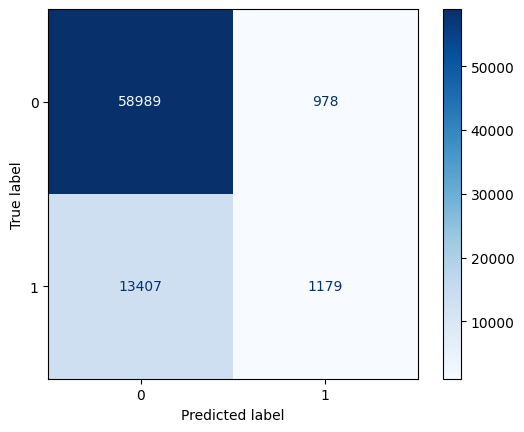

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     59967
           1       0.55      0.08      0.14     14586

    accuracy                           0.81     74553
   macro avg       0.68      0.53      0.52     74553
weighted avg       0.76      0.81      0.74     74553



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report

In [ ]:
roc_auc_score(y_test, model.predict(x_test_scaled ))

np.float64(0.5322609819193235)

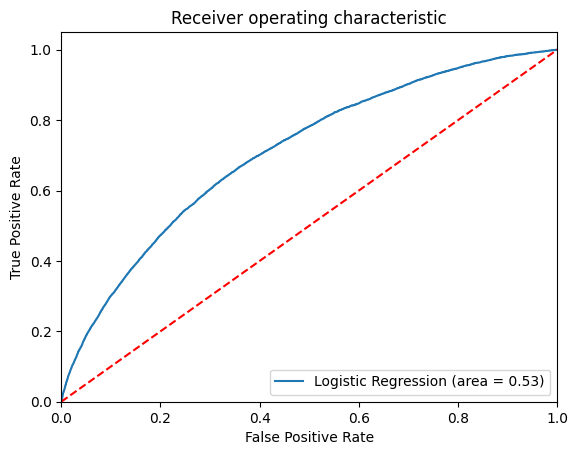

In [ ]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test_scaled )) # Actual Values and predicted categories
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_scaled)[:,1]) # Actual values and the probability values
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

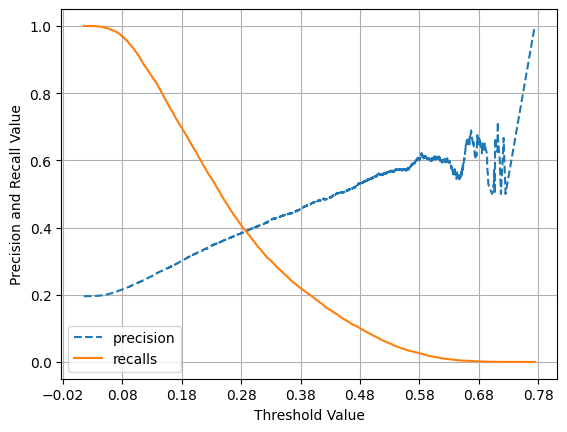

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(x_test_scaled)[:,1])

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

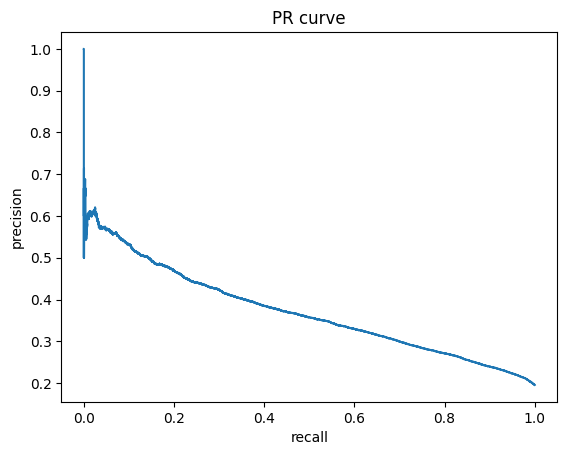

In [ ]:
precision,recall,thr = precision_recall_curve(y_test,model.predict_proba(x_test_scaled)[:,1])
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall,precision)

np.float64(0.36916537708810804)

### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [ ]:
#import varian inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(x_train)

,Feature,VIF
2,int_rate,106.61
7,purpose,50.18
3,grade,46.89
5,home_ownership,45.45
9,open_acc,13.80
13,total_acc,13.01
12,revol_util,8.79
8,dti,7.91
6,annual_inc,7.90
0,loan_amnt,6.97


We will removing column whose VIF greater than 15


In [ ]:
x_train.drop(columns = ['int_rate'],axis =1,inplace = True)
calc_vif(x_train)

,Feature,VIF
6,purpose,48.28
4,home_ownership,41.82
8,open_acc,13.68
12,total_acc,13.00
11,revol_util,8.35
7,dti,7.91
5,annual_inc,7.89
2,grade,7.34
0,loan_amnt,6.97
9,pub_rec,4.72


In [ ]:
x_train.drop(columns = ['purpose'],axis =1,inplace = True)
calc_vif(x_train)

,Feature,VIF
4,home_ownership,16.99
7,open_acc,13.60
11,total_acc,12.98
10,revol_util,8.30
6,dti,7.86
5,annual_inc,7.77
2,grade,7.18
0,loan_amnt,6.95
8,pub_rec,4.72
9,revol_bal,4.67


In [ ]:
x_train.drop(columns = ['home_ownership'],axis =1,inplace = True)
calc_vif(x_train)

,Feature,VIF
6,open_acc,13.06
10,total_acc,12.83
5,dti,7.44
9,revol_util,7.17
4,annual_inc,7.16
0,loan_amnt,6.90
2,grade,6.75
7,pub_rec,4.71
13,pub_rec_bankruptcies,4.50
8,revol_bal,4.38


In [ ]:
x_train.drop(columns = ['open_acc'],axis =1,inplace = True)
calc_vif(x_train)

,Feature,VIF
9,total_acc,7.73
4,annual_inc,7.01
8,revol_util,7.00
0,loan_amnt,6.90
5,dti,6.84
2,grade,6.59
6,pub_rec,4.71
12,pub_rec_bankruptcies,4.50
7,revol_bal,4.25
3,emp_length,3.69


In [ ]:
x_cv.drop(columns = ['int_rate','purpose','home_ownership','open_acc'],axis =1,inplace = True)

In [ ]:
x_cv.shape

(74552, 15)

In [ ]:
x_test.drop(columns = ['int_rate','purpose','home_ownership','open_acc'],axis =1,inplace = True)

In [ ]:
x_test.shape

(72190, 15)

In [ ]:
x_train.shape,x_cv.shape,x_test.shape

((223656, 15), (74552, 15), (74553, 15))

In [ ]:
y_cv.shape,y_train.shape,y_test.shape

((74552,), (223656,), (74553,))

Using SMOTE (Over sampling)

In [ ]:
smt = SMOTE()
print("before mote", y_train.value_counts())
x_sm,y_sm = smt.fit_resample(x_train,y_train)
print("after oversampling", y_sm.value_counts())

before mote loan_status
0    179348
1     44308
Name: count, dtype: int64
after oversampling loan_status
0    179348
1    179348
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled_res = scaler.fit_transform(x_sm)
x_cv_scaled_res = scaler.transform(x_cv)
x_test_scaled_res = scaler.transform(x_test)

In [ ]:
x_test_scaled_res.shape,y_test.shape

((74553, 15), (74553,))

In [ ]:
x_train_scaled_res.shape,x_cv_scaled_res.shape,x_test_scaled_res.shape

((358696, 15), (74552, 15), (74553, 15))

In [ ]:
model2 = LogisticRegression()
model2.fit(x_train_scaled_res,y_sm)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model2.predict(x_test_scaled_res)))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76     59967
           1       0.30      0.55      0.38     14586

    accuracy                           0.66     74553
   macro avg       0.58      0.62      0.57     74553
weighted avg       0.75      0.66      0.69     74553



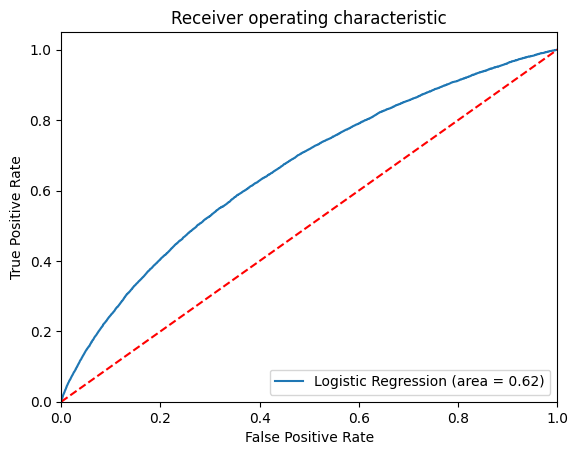

In [ ]:
logit_roc_auc = roc_auc_score(y_test, model2.predict(x_test_scaled_res)) # Actual Values and predicted categories
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(x_test_scaled_res)[:,1]) # Actual values and the probability values
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
precision2,recall2,thr2 = precision_recall_curve(y_test,model2.predict_proba(x_test_scaled_res)[:,1])

In [ ]:
auc(recall2,precision2)

np.float64(0.3200709248310356)

In [ ]:
#coeffiecnt of features
pd.DataFrame(model2.coef_,columns = x_sm.columns)

,loan_amnt,term,grade,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified
0,0.00004,0.001272,0.004167,-0.022502,-0.000007,0.034007,-0.00724,-0.000008,0.001278,-0.020265,-0.016421,-0.019473,-0.006442,0.003318,0.001109


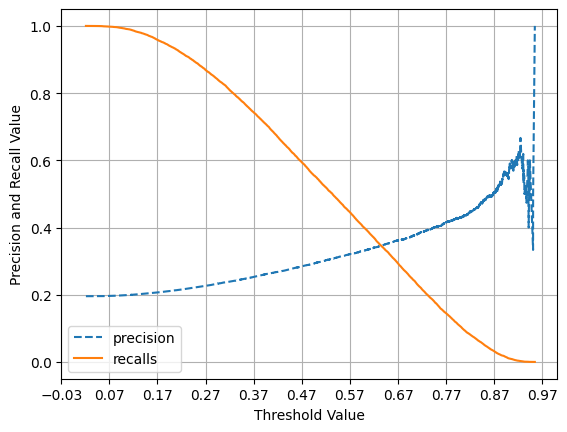

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model2.predict_proba(x_test_scaled_res)[:,1])

In [ ]:
def precision_recall_curve_plot_with_f1(y_test, pred_proba_c1):
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.metrics import precision_recall_curve

    # Get precision, recall, thresholds
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # Compute F1 scores
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)  # avoid division by zero

    # Find optimal threshold (max F1)
    optimal_idx = np.argmax(f1_scores[:-1])  # exclude last point (no threshold)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1 = f1_scores[optimal_idx]

    # Plot precision, recall, and F1
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[:-1], linestyle='-', label='Recall')
    plt.plot(thresholds, f1_scores[:-1], linestyle='-.', label='F1 Score', color='purple')

    # Annotate optimal threshold
    plt.axvline(x=optimal_threshold, color='red', linestyle=':', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.scatter(optimal_threshold, optimal_f1, color='red', s=100, edgecolor='black', label=f'Max F1 = {optimal_f1:.2f}')

    # Axis and layout
    plt.xticks(np.round(np.linspace(0, 1, num=11), 2))
    plt.xlabel('Threshold Value')
    plt.ylabel('Score')
    plt.title('Precision, Recall & F1 vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

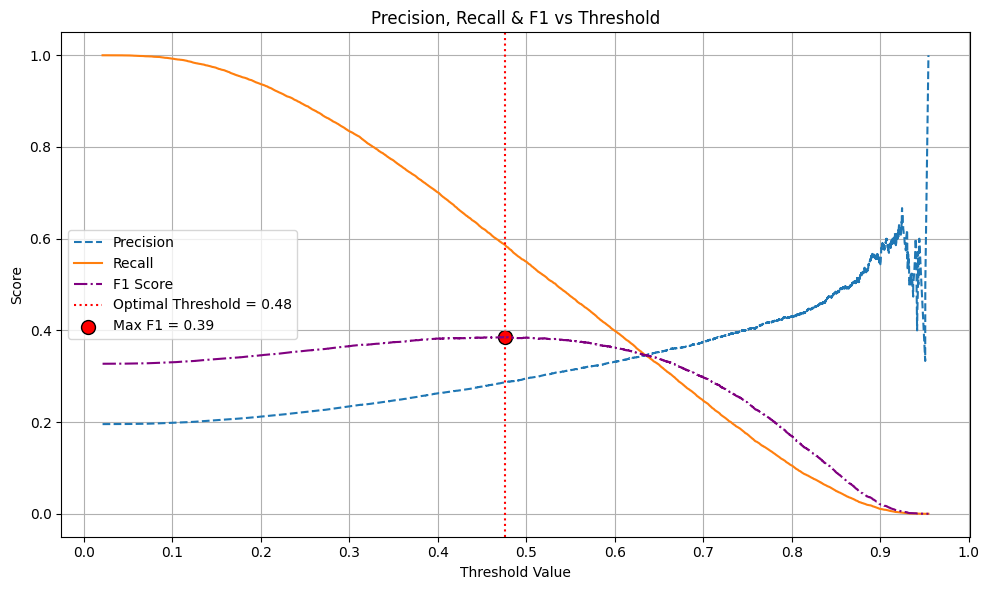

In [ ]:
precision_recall_curve_plot_with_f1(y_test, model2.predict_proba(x_test_scaled_res)[:, 1])

# Trial 3


In this we are not dropping column of datetime instead we will create column of month,year and credit_age and also we will be capping outliers

In [ ]:
df_T3 = pd.read_csv('logistic_regression.csv')

In [ ]:
#give me suggestion of all df_T2 preprocessing same steps which we did on df_T2


In [ ]:
df_T3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df_T3.select_dtypes(include = ['int64','float64'])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


In [ ]:
df_T3.drop(columns = ['installment'],axis =1,inplace = True)

In [ ]:
df_T3['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


In [ ]:
df_T3.drop(columns = ['application_type'],axis=1,inplace = True)

In [ ]:
df_T3['pub_rec'] = df_T3['pub_rec'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df_T3['pub_rec_bankruptcies'] = df_T3['pub_rec_bankruptcies'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
df_T3['issue_d'] = pd.to_datetime(df_T3['issue_d'],format = '%b-%Y')

In [ ]:
df_T3['earliest_cr_line'] = pd.to_datetime(df_T3['earliest_cr_line'],format = '%b-%Y')

In [ ]:
df_T3['issue_year'] = df_T3['issue_d'].dt.year
df_T3['issue_month'] = df_T3['issue_d'].dt.month
df_T3['credit_age_years'] = df_T3['issue_year'] - df_T3['earliest_cr_line'].dt.year

In [ ]:
df_T3.drop(columns = ['issue_d','earliest_cr_line','issue_year'],inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
col_LE = ['term','initial_list_status']
label_encoder = LabelEncoder()
for i in col_LE:
  df_T3[i] = label_encoder.fit_transform(df_T3[i])

In [ ]:
df_T3['term'].value_counts()

,count
term,
0,302005
1,94025


In [ ]:
emp_length_map = {'< 1 year' :0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
df_T3['emp_length'] = df_T3['emp_length'].map(emp_length_map)

In [ ]:
df_T3

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,issue_month,credit_age_years
0,10000.0,0,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,...,0,36369.0,41.8,25.0,1,0.0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,25
1,8000.0,0,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,...,0,20131.0,53.3,27.0,0,3.0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,11
2,15600.0,0,10.49,B,B3,Statistician,0.0,RENT,43057.0,Source Verified,...,0,11987.0,92.2,26.0,0,0.0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,8
3,7200.0,0,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,...,0,5472.0,21.5,13.0,0,0.0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",11,8
4,24375.0,1,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,...,0,24584.0,69.8,43.0,0,1.0,0,"679 Luna Roads\r\nGreggshire, VA 11650",4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,B,B4,licensed bankere,2.0,RENT,40000.0,Source Verified,...,0,1990.0,34.3,23.0,1,0.0,0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",10,11
396026,21000.0,0,12.29,C,C1,Agent,5.0,MORTGAGE,110000.0,Source Verified,...,0,43263.0,95.7,8.0,0,1.0,0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",2,9
396027,5000.0,0,9.99,B,B1,City Carrier,10.0,RENT,56500.0,Verified,...,0,32704.0,66.9,23.0,0,0.0,0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",10,16
396028,21000.0,1,15.31,C,C2,"Gracon Services, Inc",10.0,MORTGAGE,64000.0,Verified,...,0,15704.0,53.8,20.0,0,5.0,0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",8,22


In [ ]:
from sklearn.preprocessing import OneHotEncoder
col_OHE = ['verification_status']
one_hot_encoder = OneHotEncoder(sparse_output=False,drop = 'first')
encoded_features = one_hot_encoder.fit_transform(df_T3[col_OHE])

In [ ]:
encoded_df = pd.DataFrame(
encoded_features,columns = one_hot_encoder.get_feature_names_out(['verification_status']),
index = df_T3.index) # preserves row alignment

# Merge with original DataFrame

In [ ]:
df_T3 = pd.concat([df_T3.drop(columns =['verification_status']),encoded_df],axis =1)

In [ ]:
df_T3.describe(include ='object')

,grade,sub_grade,emp_title,home_ownership,loan_status,purpose,title,address
count,396030,396030,373103,396030,396030,396030,394274,396030
unique,7,35,173105,6,2,14,48816,393700
top,B,B3,Teacher,MORTGAGE,Fully Paid,debt_consolidation,Debt consolidation,USS Johnson\r\nFPO AE 48052
freq,116018,26655,4389,198348,318357,234507,152472,8


In [ ]:
df_T3.select_dtypes(include = ['int64','float64'])

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified
0,10000.0,0,11.44,10.0,117000.0,26.24,16.0,0,36369.0,41.8,25.0,1,0.0,0,0.0,0.0
1,8000.0,0,11.99,4.0,65000.0,22.05,17.0,0,20131.0,53.3,27.0,0,3.0,0,0.0,0.0
2,15600.0,0,10.49,0.0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0.0,0,1.0,0.0
3,7200.0,0,6.49,6.0,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0.0,0,0.0,0.0
4,24375.0,1,17.27,9.0,55000.0,33.95,13.0,0,24584.0,69.8,43.0,0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,2.0,40000.0,15.63,6.0,0,1990.0,34.3,23.0,1,0.0,0,1.0,0.0
396026,21000.0,0,12.29,5.0,110000.0,21.45,6.0,0,43263.0,95.7,8.0,0,1.0,0,1.0,0.0
396027,5000.0,0,9.99,10.0,56500.0,17.56,15.0,0,32704.0,66.9,23.0,0,0.0,0,0.0,1.0
396028,21000.0,1,15.31,10.0,64000.0,15.88,9.0,0,15704.0,53.8,20.0,0,5.0,0,0.0,1.0


In [ ]:
# baseline_model is df_T3
df_T4 =  df_T3.copy()

In [ ]:
df_T3.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'title', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'issue_month', 'credit_age_years',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [ ]:
df_T4.drop(columns = ['emp_title','title','address','sub_grade'],inplace = True)

In [ ]:
df_T4.head(2)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,...,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_month,credit_age_years,verification_status_Source Verified,verification_status_Verified
0,10000.0,0,11.44,B,10.0,RENT,117000.0,Fully Paid,vacation,26.24,...,36369.0,41.8,25.0,1,0.0,0,1,25,0.0,0.0
1,8000.0,0,11.99,B,4.0,MORTGAGE,65000.0,Fully Paid,debt_consolidation,22.05,...,20131.0,53.3,27.0,0,3.0,0,1,11,0.0,0.0


In [ ]:
df_T4.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'issue_month', 'credit_age_years',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [ ]:
df_T4.describe(include ='object')

,grade,home_ownership,loan_status,purpose
count,396030,396030,396030,396030
unique,7,6,2,14
top,B,MORTGAGE,Fully Paid,debt_consolidation
freq,116018,198348,318357,234507


In [ ]:
continuous_col = [
 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util',
 'open_acc', 'total_acc', 'revol_bal', 'mort_acc'
 ]

In [ ]:
# removing outliers by capping it use IQR method
for col in continuous_col:
  Q1 = df_T4[col].quantile(0.25)
  Q3 = df_T4[col].quantile(0.75)
  IQR = Q3-Q1
  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR
  df_T4[col] = np.where(df_T4[col] > upper_limit,upper_limit,
                        np.where(df_T4[col] < lower_limit,lower_limit,df_T4[col]))


In [ ]:
# imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_T4['mort_acc'] = pd.DataFrame(imputer.fit_transform(df_T4[['mort_acc']]))
df_T4['emp_length'] = pd.DataFrame(imputer.fit_transform(df_T4[['emp_length']]))

In [ ]:
df_T4.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
loan_status,0
purpose,0
dti,0


In [ ]:
df_T4['revol_util'].dropna(inplace = True)

In [ ]:
df_T4['initial_list_status'].value_counts()

,count
initial_list_status,
0,238066
1,157964


In [ ]:
df_T4.head(5)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,...,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_month,credit_age_years,verification_status_Source Verified,verification_status_Verified
0,10000.0,0,11.44,B,10.0,RENT,117000.0,Fully Paid,vacation,26.24,...,36369.0,41.8,25.0,1,0.0,0,1,25,0.0,0.0
1,8000.0,0,11.99,B,4.0,MORTGAGE,65000.0,Fully Paid,debt_consolidation,22.05,...,20131.0,53.3,27.0,0,3.0,0,1,11,0.0,0.0
2,15600.0,0,10.49,B,0.0,RENT,43057.0,Fully Paid,credit_card,12.79,...,11987.0,92.2,26.0,0,0.0,0,1,8,1.0,0.0
3,7200.0,0,6.49,A,6.0,RENT,54000.0,Fully Paid,credit_card,2.60,...,5472.0,21.5,13.0,0,0.0,0,11,8,0.0,0.0
4,24375.0,1,17.27,C,9.0,MORTGAGE,55000.0,Charged Off,credit_card,33.95,...,24584.0,69.8,43.0,0,1.0,0,4,14,0.0,1.0


In [ ]:
# removing revol_util missing values
df_T4.dropna(inplace = True)

In [ ]:
df_T4M = df_T4.copy()

In [ ]:
loan_status_map = {'Fully Paid':0,'Charged Off':1}
df_T4M['loan_status'] = df_T4M['loan_status'].map(loan_status_map)

In [ ]:
X_4 = df_T4M.drop('loan_status', axis=1) # Inplace not equal to True
y_4 = df_T4M['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
x_tr_cv,x_test,y_tr_cv,y_test = train_test_split(X_4,y_4,test_size =.2,random_state = 42)
x_train,x_cv,y_train,y_cv = train_test_split(x_tr_cv,y_tr_cv,test_size =.25,random_state = 42)

In [ ]:
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape,x_test.shape,y_test.shape

((237452, 21), (237452,), (79151, 21), (79151,), (79151, 21), (79151,))

In [ ]:
from category_encoders import TargetEncoder
col_TE = ['purpose','home_ownership','grade']
encoder = TargetEncoder(cols = col_TE)
encoder.fit(x_train,y_train)
x_train = encoder.transform(x_train)
x_cv = encoder.transform(x_cv)
x_test = encoder.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
print('coeff' , model_3.coef_)
print('intercept',model_3.intercept_)
#.intercept_)

coeff [[ 0.1209798   0.17194291  0.0479941   0.39294551  0.00624524  0.11709617
  -0.20093584  0.05298114  0.19212635  0.13979785  0.0873481  -0.09164179
   0.11337234 -0.1077151   0.00558097 -0.03797083 -0.06535944 -0.03705134
   0.02094976  0.08931322  0.05162707]]
intercept [-1.57646505]


In [ ]:
print("Training_accuracy",model_3.score(x_train_scaled,y_train))
print("CV_accuracy", model_3.score(x_cv_scaled,y_cv))

Training_accuracy 0.8056028165692435
CV_accuracy 0.8057257646776415


In [ ]:
print(classification_report(y_test, model_3.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63717
           1       0.54      0.08      0.13     15434

    accuracy                           0.81     79151
   macro avg       0.68      0.53      0.51     79151
weighted avg       0.76      0.81      0.74     79151



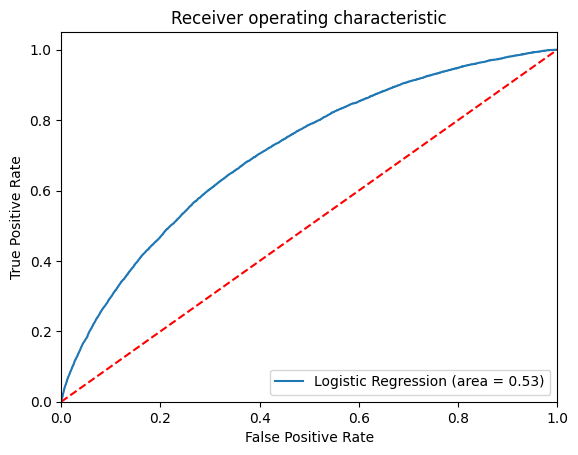

In [ ]:
logit_roc_auc = roc_auc_score(y_test, model_3.predict(x_test_scaled)) # Actual Values and predicted categories
fpr, tpr, thresholds = roc_curve(y_test, model_3.predict_proba(x_test_scaled)[:,1]) # Actual values and the probability values
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

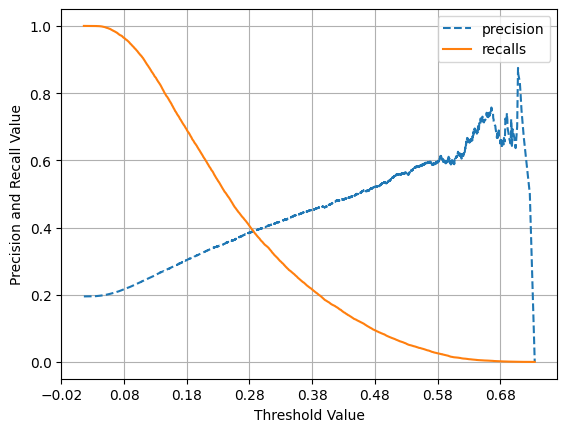

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model_3.predict_proba(x_test_scaled)[:,1])

In [ ]:
precision,recall,thr = precision_recall_curve(y_test,model_3.predict_proba(x_test_scaled)[:,1])

In [ ]:
auc(recall,precision)

np.float64(0.36916537708810804)

In [ ]:
X_4

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,purpose,dti,open_acc,...,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_month,credit_age_years,verification_status_Source Verified,verification_status_Verified
0,10000.0,0,11.44,B,10.0,RENT,117000.0,vacation,26.24,16.0,...,36369.0,41.8,25.0,1,0.0,0,1,25,0.0,0.0
1,8000.0,0,11.99,B,4.0,MORTGAGE,65000.0,debt_consolidation,22.05,17.0,...,20131.0,53.3,27.0,0,3.0,0,1,11,0.0,0.0
2,15600.0,0,10.49,B,0.0,RENT,43057.0,credit_card,12.79,13.0,...,11987.0,92.2,26.0,0,0.0,0,1,8,1.0,0.0
3,7200.0,0,6.49,A,6.0,RENT,54000.0,credit_card,2.60,6.0,...,5472.0,21.5,13.0,0,0.0,0,11,8,0.0,0.0
4,24375.0,1,17.27,C,9.0,MORTGAGE,55000.0,credit_card,33.95,13.0,...,24584.0,69.8,43.0,0,1.0,0,4,14,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,B,2.0,RENT,40000.0,debt_consolidation,15.63,6.0,...,1990.0,34.3,23.0,1,0.0,0,10,11,1.0,0.0
396026,21000.0,0,12.29,C,5.0,MORTGAGE,110000.0,debt_consolidation,21.45,6.0,...,40012.5,95.7,8.0,0,1.0,0,2,9,1.0,0.0
396027,5000.0,0,9.99,B,10.0,RENT,56500.0,debt_consolidation,17.56,15.0,...,32704.0,66.9,23.0,0,0.0,0,10,16,0.0,1.0
396028,21000.0,1,15.31,C,10.0,MORTGAGE,64000.0,debt_consolidation,15.88,9.0,...,15704.0,53.8,20.0,0,5.0,0,8,22,0.0,1.0


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Convert any object columns to numeric if possible, else drop them
    X_cleaned = X.select_dtypes(include=[float, int])

    # Now calculate VIF safely
    vif = pd.DataFrame()
    vif['Feature'] = X_cleaned.columns
    vif['VIF'] = [variance_inflation_factor(X_cleaned.values, i)
                  for i in range(X_cleaned.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by='VIF', ascending=False)

In [ ]:
calc_vif(X_4)

,Feature,VIF
6,open_acc,14.36
10,total_acc,13.92
2,int_rate,13.13
4,annual_inc,8.78
9,revol_util,8.44
5,dti,7.73
0,loan_amnt,7.20
15,credit_age_years,6.77
8,revol_bal,5.45
7,pub_rec,4.66


In [ ]:
# drop columns having vif >10
X_4.drop(columns = ['open_acc'],axis =1,inplace = True)

In [ ]:
calc_vif(X_4)

,Feature,VIF
2,int_rate,12.55
4,annual_inc,8.65
9,total_acc,8.49
8,revol_util,8.04
5,dti,7.25
0,loan_amnt,7.20
14,credit_age_years,6.77
7,revol_bal,5.18
6,pub_rec,4.65
12,pub_rec_bankruptcies,4.44


In [ ]:
X_4.drop(columns = ['int_rate'],axis =1,inplace = True)

In [ ]:
calc_vif(X_4)

,Feature,VIF
3,annual_inc,8.56
8,total_acc,8.37
0,loan_amnt,7.10
4,dti,6.77
13,credit_age_years,6.75
7,revol_util,6.12
6,revol_bal,4.77
5,pub_rec,4.64
11,pub_rec_bankruptcies,4.44
2,emp_length,4.00


# Actionable Insights & Recommendations

In [ ]:
# please write actionable insights and recommendation


Based on the analysis, here are some actionable insights and recommendations for LoanTap:

**Key Findings & Insights:**

1.  **Default Risk Factors Identified:** Analysis highlights several key factors associated with higher default risk:
    *   **Longer Loan Terms (60 months):** Loans with longer repayment periods have a higher probability of default compared to 36-month loans.
    *   **Lower Credit Grades (E, F, G):** Customers with these grades are significantly riskier, confirming LoanTap's existing assessment (marking them as risky).
    *   **Higher Loan Amounts and Interest Rates:** Defaulted loans tend to have higher average loan amounts and interest rates. This suggests a correlation between the loan burden/cost and the ability to repay.
    *   **Higher Debt-to-Income (DTI) Ratio:** Individuals with higher DTI are more likely to default, indicating financial strain.
    *   **Higher Open Accounts:** Counterintuitively, a higher number of open credit accounts is associated with defaulters in this dataset. This could indicate financial distress where the individual is opening multiple accounts to manage debt.
    *   **Public Records (Bankruptcies, Public Records):** While the ratios of paid vs. defaulted loans among those with public records are similar to those without, having any public record history is a significant "red flag" for lenders, as noted in the analysis.
    *   **Purpose - Small Business:** Loans taken for small business purposes show a slightly higher defaulter ratio compared to other purposes.

2.  **Model Performance on Imbalanced Data:**
    *   The initial model on imbalanced data had a very low F1-score for the "Charged Off" class (0.13), demonstrating its inability to effectively identify defaulters.
    *   AUROC was misleadingly high (0.70) on imbalanced data, highlighting why it's not the best metric for this specific business problem with an imbalanced target.
    *   The Precision-Recall Curve (AU PRC of 0.36) provided a more realistic view of the model's performance on the minority class before balancing.

3.  **Model Performance on Balanced Data (SMOTE & Class Weights):**
    *   Balancing the data (especially using SMOTE which showed similar performance to class weights but is often preferred) significantly improved the F1-score for the "Charged Off" class (from 0.13 to 0.42 on the test set).
    *   The model now has a better ability to recall (identify) defaulters (Recall = 0.64 on test set).
    *   However, the precision for the "Charged Off" class is still relatively low (0.32 on test set), meaning many predicted defaults are actually 'Fully Paid' loans (false positives).

4.  **Trade-off Between Precision and Recall:** As noted in the analysis, for a bank, both precision (minimizing false positives - approving risky loans) and recall (minimizing false negatives - missing good customers) are important, but the balance depends on the bank's risk appetite and strategy. Model achieves a recall of 0.64 (capturing most defaulters) at the cost of a precision of 0.32 (many false alarms).

5.  **Feature Importance from Model Coefficients:** The model coefficients highlight 'grade' as a heavily affecting feature, consistent with earlier exploratory analysis.

6.  **Optimal Threshold:** The analysis shows that a threshold of 0.5 is near optimal for maximizing the F1 score in this model.

**Actionable Recommendations:**

1.  **Refine Lending Policies based on Risk Factors:**
    *   **Loan Term:** Consider offering slightly stricter eligibility criteria or higher interest rates for 60-month loans compared to 36-month loans.
    *   **Credit Grades:** Maintain stricter scrutiny for E, F, and G grade applicants. Explore if there are specific subgroups within these grades that are less risky.
    *   **Loan Amount & Interest Rate:** Analyze the relationship between loan amount, interest rate, and default within different credit segments. Potentially cap loan amounts or set higher interest rate floors for higher-risk profiles.
    *   **DTI:** Implement stricter DTI thresholds, especially for higher loan amounts or riskier credit grades.
    *   **Open Accounts:** While it's an insight from the model, further investigation is needed to understand *why* higher open accounts are linked to default. It could be a sign of 'credit cycling' or financial stress.
    *   **Public Records:** Maintain strict policies regarding applicants with recent bankruptcy or public records history.
    *   **Purpose:** Carefully review loan applications for 'Small Business' purposes, potentially requiring additional documentation or having higher reserve requirements.


2.  **Focus on Minimizing False Negatives (Recall) while Managing False Positives (Precision):**
    *   Current model (using SMOTE or class weights) prioritizes recall (64%) over precision (32%). This means it catches a good portion of defaulters but also flags many good customers as potential defaulters.
    *   **Recommendation:** For a financial institution, *minimizing false negatives (missing defaulters)* is often more critical than minimizing false positives (rejecting good customers), as false negatives lead to direct financial losses. The current model's recall of 64% is a good starting point, but further efforts to increase it, even at the cost of a slight drop in precision, might be beneficial.


3.  **Explore Additional Data Sources and Features:**
    *   The current features provide a good starting point. Consider incorporating more granular data if available, such as:
        *   Detailed transaction history (if permissible and available).
        *   More nuanced employment stability data (beyond just length).
        *   Geographic information (if applicable and non-discriminatory).
        *   Alternative credit data.

4.  **Monitor and Retrain the Model Regularly:** The economic climate and borrower behavior change over time. Continuously monitor the model's performance (especially F1-score, precision, and recall) on new data and retrain it periodically to ensure it remains effective.

5.  **Analyze Rejected Applications:** Track the performance of applications flagged by the model as high-risk that were potentially *overridden* and approved by underwriters. This provides valuable feedback for model improvement and underwriting guidelines.

7.  **Cost-Benefit Analysis:** Quantify the cost of false positives (loss of potential business) versus the cost of false negatives (actual loan defaults). This analysis can help determine the optimal balance between precision and recall and inform the final decision threshold and underwriting workflow.

By implementing these recommendations, LoanTap can leverage the insights from the analysis and model to make more informed lending decisions, potentially reduce Non-Performing Assets (NPAs), and optimize profitability while managing risk.